## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import statsmodels.api as sm
from sklearn import datasets
from functools import reduce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn import datasets, metrics, svm
from sklearn.metrics import auc, roc_auc_score, mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image
import seaborn as sns
from typing import List, Dict
import os
import time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import interp
import matplotlib.patches as patches

# the warning wrapper is to avoid an annoying warning of h5py
import warnings
warnings.filterwarnings('ignore')
import h5py
warnings.resetwarnings()

# Part 1 - Data Understanding / Exploration

In [2]:
data = pd.read_csv('train.csv')
data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


In [3]:
test_data = pd.read_csv('test.csv')

Data view

In [4]:
pd.set_option('display.max_columns', None)
data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,0.0,Feb,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,0.4,Feb,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,12.241717,0.0,Dec,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,0.000000,0.0,Nov,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,0.000000,0.0,Nov,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,0.000000,0.0,Nov,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


In [5]:
pd.set_option('display.max_columns', None)
test_data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
0,0,0.0,0.00,0.0,0.0 minutes,2.0,64.0 minutes,NaN,0.000000,0.100000,0.0,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_2,92.487250,log200,NaN
1,1,0.0,0.00,0.0,0.0 minutes,2.0,2.666666667 minutes,NaN,0.050000,0.140000,0.0,0.0,Feb,3.0,chrome_98.0.1,2.0,Returning_Visitor,False,c_4,120.493478,log400,NaN
2,2,1.0,0.00,0.0,0.0 minutes,0.0,NaN,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_5,94.120580,log400,NaN
3,3,0.0,NaN,0.0,0.0 minutes,2.0,32.0 minutes,32.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,chrome_90.1.7,1.0,Returning_Visitor,False,c_3,115.990484,log8080,NaN
4,4,0.0,0.00,0.0,0.0 minutes,4.0,63.0 minutes,NaN,0.000000,0.050000,0.0,0.2,Feb,2.0,browser_6_v12,1.0,Returning_Visitor,False,c_3,93.866618,log404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846,0.0,0.00,0.0,0.0 minutes,3.0,35.0 minutes,35.000000,0.000000,0.066667,0.0,0.0,Nov,4.0,safari_13,1.0,Returning_Visitor,False,c_1,90.187780,log200,NaN
1847,1847,0.0,0.00,0.0,0.0 minutes,5.0,108.0 minutes,NaN,0.000000,0.040000,0.0,0.0,Dec,2.0,chrome_99.1.4,1.0,New_Visitor,False,c_2,110.914752,log_100,NaN
1848,1848,0.0,0.00,0.0,0.0 minutes,39.0,1168.619841 minutes,1168.619841,0.000000,0.009064,0.0,0.0,Nov,1.0,safari_14.1,4.0,Returning_Visitor,False,c_3,113.442371,log200,NaN
1849,1849,NaN,19.00,0.0,0.0 minutes,45.0,4018.45 minutes,4037.450000,0.009091,0.021970,0.0,0.0,Nov,2.0,chrome_99.1.4,3.0,Returning_Visitor,True,c_1,109.357236,log_100,NaN


In [6]:
data.shape

(10479, 23)

In [7]:
test_data.shape

(1851, 22)

Data description

In [8]:
data.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


Finding categorial fearures

In [9]:
all_cols = data.columns
numeric = data.select_dtypes(include=[np.number]).columns
cat_cols_train = list(set(all_cols) - set(numeric))
cat_cols_train

['Weekend',
 'A',
 'product_page_duration',
 'Month',
 'internet_browser',
 'info_page_duration',
 'C',
 'user_type']

In [10]:
all_cols = test_data.columns
test_numeric = test_data.select_dtypes(include=[np.number]).columns
cat_cols_test = list(set(all_cols) - set(numeric))
cat_cols_test

['Weekend',
 'A',
 'product_page_duration',
 'Month',
 'internet_browser',
 'info_page_duration',
 'C',
 'user_type']

In [11]:
data[cat_cols_train]

,Weekend,A,product_page_duration,Month,internet_browser,info_page_duration,C,user_type
0,False,c_1,0.0 minutes,Feb,safari_15,0.0 minutes,log202,Returning_Visitor
1,False,c_3,0.0 minutes,Feb,safari_14,0.0 minutes,log404,Returning_Visitor
2,True,c_4,627.5 minutes,Feb,browser_3_v17,NaN,log202,Returning_Visitor
3,False,c_3,154.2166667 minutes,Feb,chrome_99.1.3,0.0 minutes,log_100,Returning_Visitor
4,False,c_3,0.0 minutes,Feb,edge_96.0.1054.75,0.0 minutes,log202,Returning_Visitor
...,...,...,...,...,...,...,...,...
10474,True,c_1,1783.791667 minutes,Dec,browser_6_v12,0.0 minutes,log400,Returning_Visitor
10475,True,c_8,465.75 minutes,Nov,chrome_98.0.1,0.0 minutes,log202,Returning_Visitor
10476,True,c_13,184.25 minutes,Nov,chrome_99.1.3,0.0 minutes,log8080,Returning_Visitor
10477,False,c_11,346.0 minutes,Nov,chrome_80,0.0 minutes,log400,Returning_Visitor


Checking if the type of "Weekend" feature is bool or object

In [12]:
data['Weekend'].dtype

dtype('O')

The 'Weekend' column is an Object type. Therefoe, in the next Part we will convert it to a bool column

How the numerical features are distributes

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>],
       [<AxesSubplot:title={'center':'num_of_product_pages'}>,
        <AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'closeness_to_holiday'}>,
        <AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'Region'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'purchase'}>, <AxesSubplot:>]],
      dtype=object)

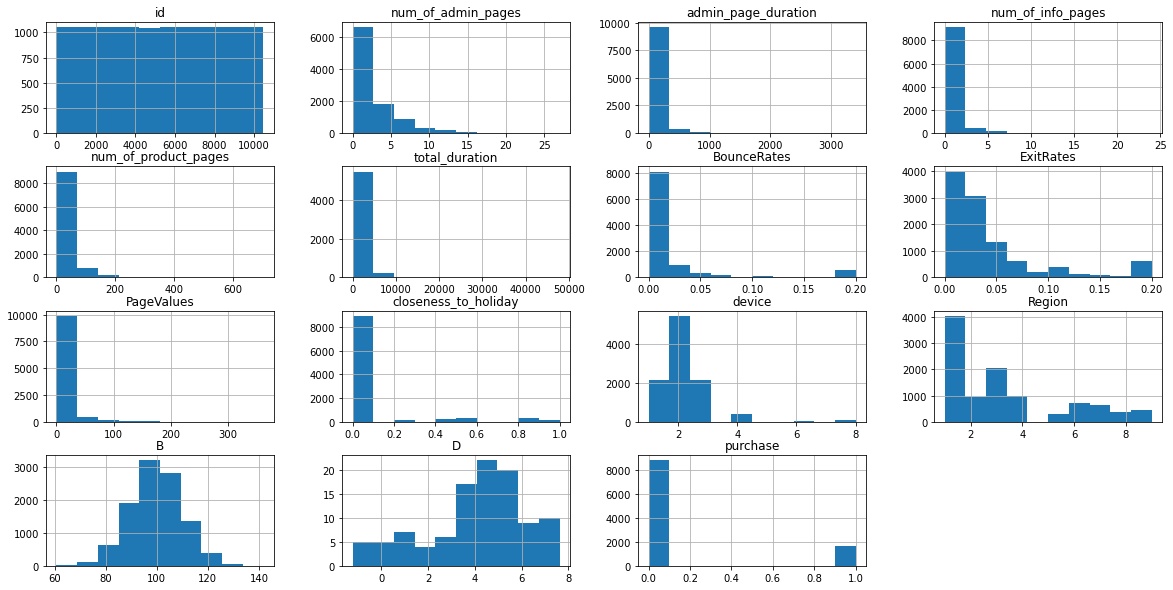

In [13]:
data.loc[:, numeric].hist(figsize=(20,10))

Conclusions from the histograms:
 - We can see that the features 'Region', 'Device', 'num of info pages', 'num of admin pages', 'num of product pages' and 'purchase' distibute discritly. Therefore, if there are NA values, we will fill them for example with the median value and not with the mean value. 
 - We can see that all the other featurs distibute continuously. Therefore, if there are NA values, we will fill them for example with the mean value. 
 - We can see tha the features 'B' and 'D' resemble Normal distribution. 
 - We can see the outliers based on the histogram, and in the next part (Data Preparation / Preprocessing) we will get rid of them.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>],
       [<AxesSubplot:title={'center':'num_of_product_pages'}>,
        <AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'closeness_to_holiday'}>,
        <AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'Region'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'D'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

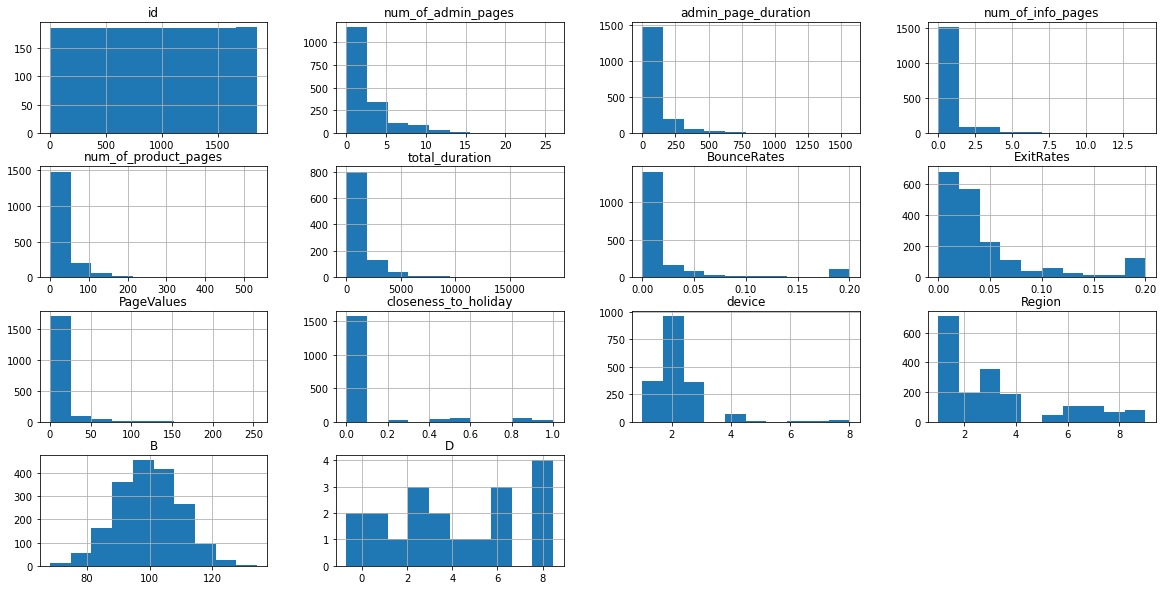

In [14]:
test_data.loc[:, test_numeric].hist(figsize=(20,10))

Function for "Purchase" feature percentage

In [15]:
def percentage_function(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

Checking whether the 'User Type' feature influences our label by seeing the percentage

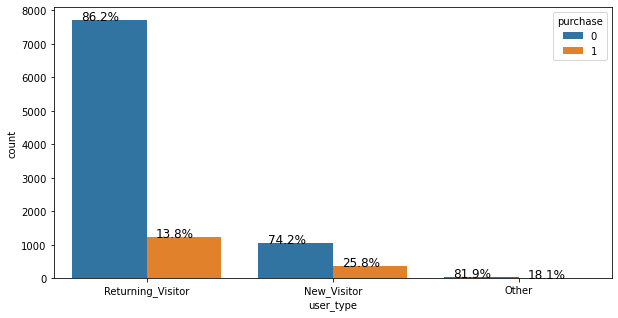

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
ax = sns.countplot(x="user_type",hue='purchase' , data=data)
percentage_function(ax, data['user_type'], 3,2)
plt.show()

Conclusuon from the countplot
 - We defind a function in order to calculate the percentage of purchases made by each user type in our data 
 - We can see that we have got the lowest purchase percentage from the Returning Visitors

Checking the the top 8 most used categorial distribution of 'internet_browser' feature

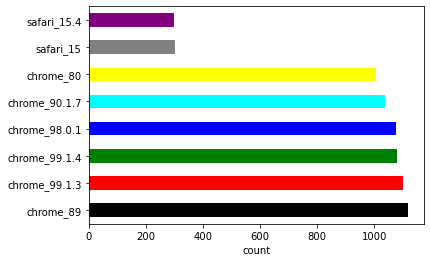

In [17]:
data['internet_browser'].value_counts().head(8).plot(kind = 'barh', color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'gray', 'purple', 'orange', 'brown'])
plt.xlabel('count')
plt.show()

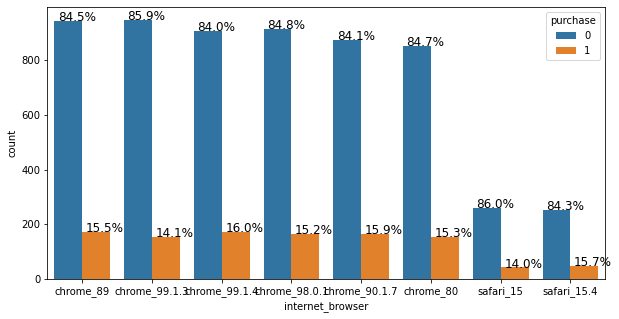

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
ax = sns.countplot(x='internet_browser',hue='purchase' , data=data, order=data['internet_browser'].value_counts().iloc[:8].index)
percentage_function(ax, data['internet_browser'], 8,2)
plt.show()

Conclusion
 - We can see that "Chrome" (in all it's versions) is the most common browser that visitors use to enter the website 
 - There is no specific browser that has a high purchase pecentage vs other browsers
 - About one of every six visitors makes a purchase on the website

Checking the number of occurrences of every value for the following features 

In [19]:
data['internet_browser'].value_counts()

chrome_89         1117
chrome_99.1.3     1101
chrome_99.1.4     1080
chrome_98.0.1     1078
chrome_90.1.7     1038
                  ... 
browser_12_v16       1
browser_9_v13        1
browser_7_v13        1
browser_7_v18        1
browser_12_v12       1
Name: internet_browser, Length: 126, dtype: int64

In [20]:
data['Region'].value_counts()

1.0    4056
3.0    2044
4.0     996
2.0     940
6.0     695
7.0     655
9.0     431
8.0     369
5.0     274
Name: Region, dtype: int64

In [21]:
data['device'].value_counts()

2.0    5429
1.0    2130
3.0    2120
4.0     388
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

In [22]:
test_data['user_type'].value_counts()

Returning_Visitor    1577
New_Visitor           259
Other                  13
Name: user_type, dtype: int64

Conclusions from the value_counts function
 - For the "internet_browser" and "device" features, there are some browsers and devices which are barely used to enter the website. Therefore, in the next part (Data Preparation / Preprocessing) we will combine them into one value called "other" respectively
 - For the "Region" feature, the same could not be concluded.

Checking the toal duration that a visitors spend when they make a purchase or not (by "total_duration" feature against the "purchase" (label) feature)

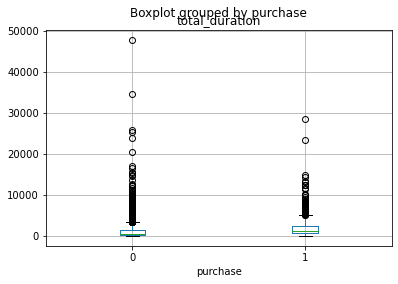

In [23]:
data.boxplot(column='total_duration', by='purchase')
plt.show()

In [24]:
data['B'].skew()

-0.014209731687308658

Conclusions
 - We can see that the time spent by visitors who makes purchases is a bit higher than those who don't
 - We can see the outliers based on the boxplot, and in the next part (Data Preparation / Preprocessing) we will get rid of them.

Checking the correlation between all of the fearures

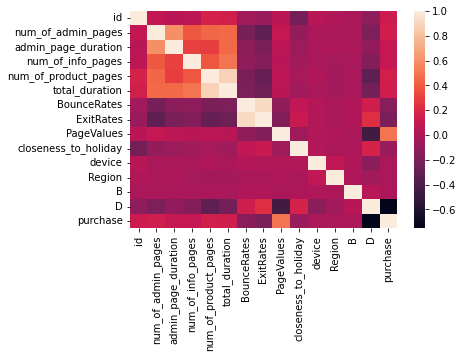

In [25]:
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns)
plt.show()

In [26]:
corr_data = data.corr()
corr_data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
id,1.000000,0.082526,0.044857,0.066631,0.173407,0.151529,-0.054239,-0.077429,0.053881,-0.225908,0.043127,0.010513,-0.016671,-0.129515,0.124522
num_of_admin_pages,0.082526,1.000000,0.591505,0.383974,0.436619,0.447180,-0.222772,-0.317713,0.102648,-0.099734,-0.010604,-0.007737,-0.016465,-0.197337,0.145048
admin_page_duration,0.044857,0.591505,1.000000,0.297256,0.291797,0.445325,-0.141197,-0.202072,0.068009,-0.072091,-0.011671,-0.003730,-0.018782,-0.110871,0.097504
num_of_info_pages,0.066631,0.383974,0.297256,1.000000,0.382615,0.489927,-0.116471,-0.165944,0.046150,-0.051921,-0.011148,-0.032790,-0.021416,-0.167875,0.095563
num_of_product_pages,0.173407,0.436619,0.291797,0.382615,1.000000,0.877881,-0.202365,-0.292254,0.057020,-0.027799,0.000877,-0.043437,-0.019066,-0.326672,0.157167
total_duration,0.151529,0.447180,0.445325,0.489927,0.877881,1.000000,-0.192154,-0.265104,0.054231,-0.049315,-0.007370,-0.046022,-0.026004,-0.236378,0.145429
BounceRates,-0.054239,-0.222772,-0.141197,-0.116471,-0.202365,-0.192154,1.000000,0.911589,-0.116746,0.081161,0.024877,-0.008510,0.008744,0.147855,-0.150683
ExitRates,-0.077429,-0.317713,-0.202072,-0.165944,-0.292254,-0.265104,0.911589,1.000000,-0.172314,0.111041,0.015076,-0.009308,0.007393,0.231711,-0.207804
PageValues,0.053881,0.102648,0.068009,0.046150,0.057020,0.054231,-0.116746,-0.172314,1.000000,-0.062112,0.019302,0.010091,-0.012400,-0.447703,0.486404
closeness_to_holiday,-0.225908,-0.099734,-0.072091,-0.051921,-0.027799,-0.049315,0.081161,0.111041,-0.062112,1.000000,0.018269,-0.012651,-0.005234,0.171953,-0.083926


Conclusions
 - We wanted to see if there are features that have a strong correlation with other features, that we can ignore them when we implenet our model on the data.
 - For featurs with strong correlation we will fill the missing values based on categorialization of the correlated features in the next part (Data Preparation / Preprocessing)
 - For featurs with strong correlation we shall see if the removel of one of the correlated features will increase the AUC of our model in the next part (Data Preparation / Preprocessing)

Checking missing values

Function that returns the missing values per feature:

In [27]:
def missing_values (train_data):
    null_data = train_data.isnull().sum()
    null_data_above_0 = null_data[null_data>0]
    df_train_data = pd.DataFrame(null_data_above_0, columns=['COUNT'])
    return df_train_data

In [28]:
missing_values(data).sort_values('COUNT', ascending=False)

,COUNT
D,10374
total_duration,4753
A,706
num_of_info_pages,687
product_page_duration,621
num_of_admin_pages,605
internet_browser,563
closeness_to_holiday,496
admin_page_duration,413
num_of_product_pages,403


In [29]:
missing_values(test_data).sort_values('COUNT', ascending=False)

,COUNT
D,1832
total_duration,844
num_of_info_pages,126
A,121
product_page_duration,113
internet_browser,107
num_of_admin_pages,93
closeness_to_holiday,87
admin_page_duration,78
num_of_product_pages,77


In the next part(Data Preparation / Preprocessing) we will deal with the missing vslues in accordance to our model

# Part 2 - Data Preparation / Preprocessing

Function that returns the heatmap every time we change the data:

In [30]:
def heat_map (data):
    sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns)
    plt.show()

In the previous part we noticed 3 features that resemble Numeric type, but where saved in our data as Object type. Now we will change them to Numeric type to make better predictions in our model.
removing unnecessary strings from some of the features in order to convert their type to Numeric (the same for test data):

In [31]:
data['C'].value_counts()

log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: C, dtype: int64

In [32]:
data['C'] = data['C'].str.replace("log_", "")
data['C'] = data['C'].str.replace("log", "")

In [33]:
test_data['C'] = test_data['C'].str.replace("log_", "")
test_data['C'] = test_data['C'].str.replace("log", "")

In the section of the dummys converting, we will convert feature 'C' also to dummy veraible.

In [34]:
data['product_page_duration'] = data['product_page_duration'].str.replace("minutes", "")

In [35]:
test_data['product_page_duration'] = test_data['product_page_duration'].str.replace("minutes", "")

In [36]:
data['info_page_duration'] = data['info_page_duration'].str.replace("minutes", "")

In [37]:
test_data['info_page_duration'] = test_data['info_page_duration'].str.replace("minutes", "")

Converting the type of the features 

In [38]:
data['C'] = data['C'].astype('float')

In [39]:
test_data['C'] = test_data['C'].astype('float')

In [40]:
data['product_page_duration'] = data['product_page_duration'].astype('float')

In [41]:
test_data['product_page_duration'] = test_data['product_page_duration'].astype('float')

In [42]:
data['info_page_duration'] = data['info_page_duration'].astype('float')

In [43]:
test_data['info_page_duration'] = test_data['info_page_duration'].astype('float')

Converting the type of column "Weekend" from object to bool for further use

In [44]:
data['Weekend'] = data['Weekend'].astype('bool')

In [45]:
test_data['Weekend'] = test_data['Weekend'].astype('bool')

Data heatmap after the changes

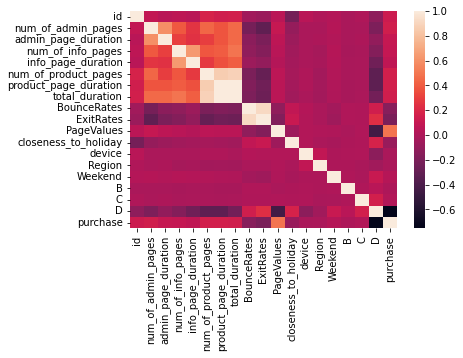

In [46]:
heat_map(data)

Test Data heatmap after the changes

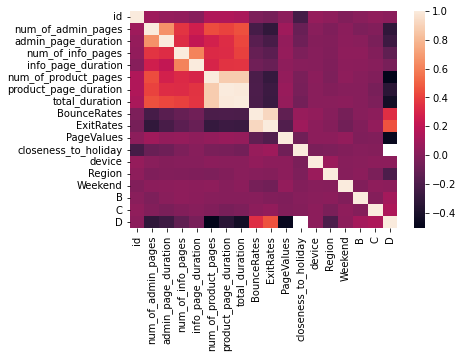

In [47]:
heat_map(test_data)

## Dealing with missing values

First of all, we can see that the feature 'D' has 10,374 missing values out of 10,479 observations. Therefore, we will get rid of this feature due to it's insignificancy in our model:

In [48]:
data.drop(['D'], axis = 1, inplace=True)

In [49]:
test_data.drop(['D'], axis = 1, inplace=True)

'total_duration' and 'num_of_product_pages' features:

Filling missing values in 'num_of_product_pages' feature:

In [50]:
num_of_product_pages_median = data['num_of_product_pages'].median()
data['num_of_product_pages'].fillna(num_of_product_pages_median, inplace=True)

In [51]:
test_data['num_of_product_pages'].fillna(num_of_product_pages_median, inplace=True)

By looking at the heatmap in the last part, we saw that the correlation between 'total_duration' and 'num_of_product_pages' is very high:

In [52]:
data[['total_duration','num_of_product_pages']].corr()

,total_duration,num_of_product_pages
total_duration,1.000000,0.868048
num_of_product_pages,0.868048,1.000000


We can see that the correlation between 'total_duration' feature and 'num_of_product_pages' feature is very high. Therefore, we will fill the missing values in the 'total_duration' feature by the median of every 2 categorial product pages.

Filling missing values in 'total_duration' feature:

In [53]:
num_of_product_pages_median = data['num_of_product_pages'].median()
total_duration_half1 = data[data['num_of_product_pages'] < num_of_product_pages_median]['total_duration'].mean()
total_duration_half2 = data[data['num_of_product_pages'] >= num_of_product_pages_median]['total_duration'].mean()

data.loc[data['num_of_product_pages'] < num_of_product_pages_median, 'total_duration'] = \
     data.loc[data['num_of_product_pages'] < num_of_product_pages_median, 'total_duration'].fillna(total_duration_half1)
data.loc[data['num_of_product_pages'] >= num_of_product_pages_median, 'total_duration'] = \
    data.loc[data['num_of_product_pages'] >= num_of_product_pages_median, 'total_duration'].fillna(total_duration_half2)

In [54]:
num_of_product_pages_median = test_data['num_of_product_pages'].median()
total_duration_half1 = test_data[test_data['num_of_product_pages'] < num_of_product_pages_median]['total_duration'].mean()
total_duration_half2 = test_data[test_data['num_of_product_pages'] >= num_of_product_pages_median]['total_duration'].mean()

test_data.loc[test_data['num_of_product_pages'] < num_of_product_pages_median, 'total_duration'] = \
     test_data.loc[test_data['num_of_product_pages'] < num_of_product_pages_median, 'total_duration'].fillna(total_duration_half1)
test_data.loc[test_data['num_of_product_pages'] >= num_of_product_pages_median, 'total_duration'] = \
     test_data.loc[test_data['num_of_product_pages'] >= num_of_product_pages_median, 'total_duration'].fillna(total_duration_half2)

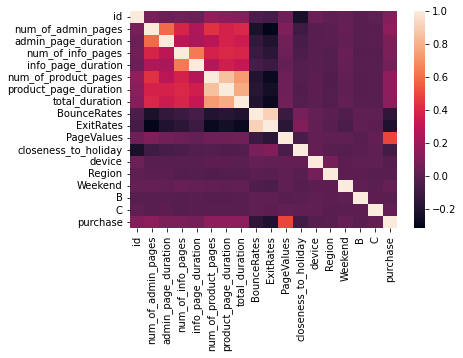

In [55]:
heat_map(data)

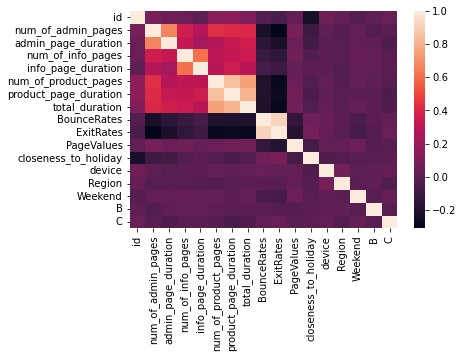

In [56]:
heat_map(test_data)

By Looking at the heatmap we can also see a high correlation between 'num_of_product_pages' and 'product_page_duration' as expected. Therefore, we will fill in the missing values for this feature in the same way we did in the 'total_duration' feature:

In [57]:
num_of_product_pages_median = data['num_of_product_pages'].median()
product_page_duration_half1 = data[data['num_of_product_pages'] < num_of_product_pages_median]['product_page_duration'].mean()
product_page_duration_half2 = data[data['num_of_product_pages'] >= num_of_product_pages_median]['product_page_duration'].mean()

data.loc[data['num_of_product_pages'] < num_of_product_pages_median, 'product_page_duration'] = \
     data.loc[data['num_of_product_pages'] < num_of_product_pages_median, 'product_page_duration'].fillna(product_page_duration_half1)
data.loc[data['num_of_product_pages'] >= num_of_product_pages_median, 'product_page_duration'] = \
    data.loc[data['num_of_product_pages'] >= num_of_product_pages_median, 'product_page_duration'].fillna(product_page_duration_half2)

In [58]:
num_of_product_pages_median = test_data['num_of_product_pages'].median()
product_page_duration_half1 = test_data[test_data['num_of_product_pages'] < num_of_product_pages_median]['product_page_duration'].mean()
product_page_duration_half2 = test_data[test_data['num_of_product_pages'] >= num_of_product_pages_median]['product_page_duration'].mean()

test_data.loc[test_data['num_of_product_pages'] < num_of_product_pages_median, 'product_page_duration'] = \
    test_data.loc[test_data['num_of_product_pages'] < num_of_product_pages_median, 'product_page_duration'].fillna(product_page_duration_half1)
test_data.loc[test_data['num_of_product_pages'] >= num_of_product_pages_median, 'product_page_duration'] = \
    test_data.loc[test_data['num_of_product_pages'] >= num_of_product_pages_median, 'product_page_duration'].fillna(product_page_duration_half2)

'user_type' features

After looking at the countplot of 'user_type' we saw that the vast majority of the sessions were made by Returning Visitors (about 90%). Therefore, we decided to fill the missing values in this feature with this user type

In [59]:
data['user_type'].fillna("Returning_Visitor", inplace = True)

And also after looking at the value count function on the user_type feature on the test data we saw that 'Returning_Visitor' is the majority of thr values, and we will fill NA due to this fact:

In [60]:
test_data['user_type'].fillna("Returning_Visitor", inplace = True)

'num_of_admin_pages' and 'admin_page_duration' features:

Filling missing values in 'admin_page_duration' feature:

In [61]:
admin_page_duration_mean = data['admin_page_duration'].mean()
data['admin_page_duration'].fillna(admin_page_duration_mean, inplace=True)

In [62]:
test_data['admin_page_duration'].fillna(admin_page_duration_mean, inplace=True)

By looking at the heatmap in the last part, we saw that the correlation between 'num_of_admin_pages' and 'admin_page_duration' is very high:

In [63]:
data[['num_of_admin_pages','admin_page_duration']].corr()

,num_of_admin_pages,admin_page_duration
num_of_admin_pages,1.000000,0.581458
admin_page_duration,0.581458,1.000000


We can see that the correlation between 'num_of_admin_pages' feature and 'admin_page_duration' feature is very high. Therefore, we will fill the missing values in the 'num_of_admin_pages' feature by the median of every 2 categorial product pages and fill the missing values in the 'admin_page_duration' feature by the mean of every 2 categorial product pages

Filling missing values in 'num_of_admin_pages' feature:

In [64]:
admin_page_duration_mean = data['admin_page_duration'].mean()
num_of_admin_pages_half1 = data[data['admin_page_duration'] < admin_page_duration_mean]['num_of_admin_pages'].median()
num_of_admin_pages_half2 = data[data['admin_page_duration'] >= admin_page_duration_mean]['num_of_admin_pages'].median()

data.loc[data['admin_page_duration'] < admin_page_duration_mean, 'num_of_admin_pages'] = \
     data.loc[data['admin_page_duration'] < admin_page_duration_mean, 'num_of_admin_pages'].fillna(num_of_admin_pages_half1)
data.loc[data['admin_page_duration'] >= admin_page_duration_mean, 'num_of_admin_pages'] = \
    data.loc[data['admin_page_duration'] >= admin_page_duration_mean, 'num_of_admin_pages'].fillna(num_of_admin_pages_half2)

In [65]:
admin_page_duration_mean = test_data['admin_page_duration'].mean()
num_of_admin_pages_half1 = test_data[test_data['admin_page_duration'] < admin_page_duration_mean]['num_of_admin_pages'].median()
num_of_admin_pages_half2 = test_data[test_data['admin_page_duration'] >= admin_page_duration_mean]['num_of_admin_pages'].median()

test_data.loc[test_data['admin_page_duration'] < admin_page_duration_mean, 'num_of_admin_pages'] = \
    test_data.loc[test_data['admin_page_duration'] < admin_page_duration_mean, 'num_of_admin_pages'].fillna(num_of_admin_pages_half1)
test_data.loc[test_data['admin_page_duration'] >= admin_page_duration_mean, 'num_of_admin_pages'] = \
    test_data.loc[test_data['admin_page_duration'] >= admin_page_duration_mean, 'num_of_admin_pages'].fillna(num_of_admin_pages_half2)

'num_of_info_pages' and 'info_page_duration' features:

Filling missing values in 'info_page_duration' feature:

In [66]:
info_page_duration_mean = data['info_page_duration'].mean()
data['info_page_duration'].fillna(info_page_duration_mean, inplace=True)

In [67]:
test_data['info_page_duration'].fillna(info_page_duration_mean, inplace=True)

By looking at the heatmap in the last part, we saw that the correlation between 'num_of_info_pages' and 'info_page_duration' is very high:

In [68]:
data[['info_page_duration','num_of_info_pages']].corr()

,info_page_duration,num_of_info_pages
info_page_duration,1.000000,0.622905
num_of_info_pages,0.622905,1.000000


We can see that the correlation between 'num_of_info_pages' feature and 'info_page_duration' feature is very high. Therefore, we will fill the missing values in the 'num_of_info_pages' feature by the median of every 2 categorial product pages and fill the missing values in the 'info_page_duration' feature by the mean of every 2 categorial product pages

Filling missing values in 'num_of_info_pages' feature:

In [69]:
info_page_duration_mean = data['info_page_duration'].mean()
num_of_info_pages_half1 = data[data['info_page_duration'] < info_page_duration_mean]['num_of_info_pages'].median()
num_of_info_pages_half2 = data[data['info_page_duration'] >= info_page_duration_mean]['num_of_info_pages'].median()

data.loc[data['info_page_duration'] < info_page_duration_mean, 'num_of_info_pages'] = \
     data.loc[data['info_page_duration'] < info_page_duration_mean, 'num_of_info_pages'].fillna(num_of_info_pages_half1)
data.loc[data['info_page_duration'] >= info_page_duration_mean, 'num_of_info_pages'] = \
    data.loc[data['info_page_duration'] >= info_page_duration_mean, 'num_of_info_pages'].fillna(num_of_info_pages_half2)

In [70]:
info_page_duration_mean = test_data['info_page_duration'].mean()
num_of_info_pages_half1 = test_data[test_data['info_page_duration'] < info_page_duration_mean]['num_of_info_pages'].median()
num_of_info_pages_half2 = test_data[test_data['info_page_duration'] >= info_page_duration_mean]['num_of_info_pages'].median()

test_data.loc[test_data['info_page_duration'] < info_page_duration_mean, 'num_of_info_pages'] = \
    test_data.loc[test_data['info_page_duration'] < info_page_duration_mean, 'num_of_info_pages'].fillna(num_of_info_pages_half1)
test_data.loc[test_data['info_page_duration'] >= info_page_duration_mean, 'num_of_info_pages'] = \
    test_data.loc[test_data['info_page_duration'] >= info_page_duration_mean, 'num_of_info_pages'].fillna(num_of_info_pages_half2)

Filling missing values in 'closeness_to_holiday' feature:

In [71]:
data['closeness_to_holiday'][data['closeness_to_holiday'] == 0].count()

8958

In [72]:
test_data['closeness_to_holiday'][test_data['closeness_to_holiday'] == 0].count()

1581

We can see that almost 90% of observations contains the value 0 in the 'closeness to holiday' feature, so we decided to fill in the missing values with the same value:

In [73]:
data['closeness_to_holiday'].fillna(0, inplace=True)

In [74]:
test_data['closeness_to_holiday'].fillna(0, inplace=True)

Filling missing values in 'device' feature:

In [75]:
data['device'].value_counts()

2.0    5429
1.0    2130
3.0    2120
4.0     388
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

In [76]:
test_data['device'].value_counts()

2.0    962
1.0    374
3.0    362
4.0     71
8.0     13
7.0      3
6.0      1
5.0      1
Name: device, dtype: int64

We can see that most of the observations contains the values 2.0,1.0.3.0. Therefore, we will use the method that fills missing values based on the values in previous observations:

In [77]:
data['device'].fillna(method='ffill', inplace=True)

In [78]:
test_data['device'].fillna(method='ffill', inplace=True)

Filling missing values in 'A' feature with the same method that we use to fill the missing values in the 'device' feature:

In [79]:
data['A'].value_counts()

c_2        3101
c_1        1944
c_3        1644
c_4         850
c_13        586
           ... 
c_20_75       1
c_20_28       1
c_20_33       1
c_20_79       1
c_20_23       1
Name: A, Length: 96, dtype: int64

In [80]:
data['A'].fillna(method='ffill', inplace=True)

In [81]:
test_data['A'].value_counts()

c_2        562
c_1        331
c_3        289
c_4        143
c_13       109
c_6         76
c_10        57
c_8         49
c_5         36
c_11        27
c_9          8
c_15         4
c_14         3
c_19         3
c_18         3
c_7          3
c_20_73      2
c_20_86      2
c_20_60      1
c_20_29      1
c_20_43      1
c_20_32      1
c_20_91      1
c_20_28      1
c_20_59      1
c_20_76      1
c_20_87      1
c_20_31      1
c_20_66      1
c_20_35      1
c_20_89      1
c_20_10      1
c_20_81      1
c_20_44      1
c_20_85      1
c_20_7       1
c_20_88      1
c_20_95      1
c_20_50      1
c_12         1
c_20_62      1
Name: A, dtype: int64

In [82]:
test_data['A'].fillna(method='ffill', inplace=True)

Filling missing values in 'BounceRates' and 'ExitRates' features:

By looking at the heatmap we can see a high correlation between them:

In [83]:
data[['BounceRates','ExitRates']].corr()

,BounceRates,ExitRates
BounceRates,1.000000,0.911589
ExitRates,0.911589,1.000000


Despite the high correlation between ExitRates and BounceRates we don't want to fill the missing values in the same way. The reason is that those features represent a specific value for every page in the website, so filling in the mean won't have any meaning behind it.
Also, filling in the median can also affect the data because no value has a high value count compared to other pages.
So we will drop the very few missing values (about 25 each) for these features.

In [84]:
data = data.dropna(subset=['BounceRates', 'ExitRates'])

In [85]:
test_data['BounceRates'].fillna(method='ffill', inplace=True)
test_data['ExitRates'].fillna(method='ffill', inplace=True)

Filling missing values in 'Month' feature:

We will fill the missing values by the common month:

In [86]:
missing_values(data['Month'])

,COUNT
0,7


In [87]:
data['Month'].value_counts()

May     2854
Nov     2532
Mar     1613
Dec     1448
Oct      468
Sep      378
Jul      365
Aug      365
June     247
Feb      163
Name: Month, dtype: int64

In [88]:
missing_values(test_data['Month'])

,COUNT
0,3


In [89]:
test_data['Month'].value_counts()

May     502
Nov     448
Mar     290
Dec     272
Oct      74
Sep      69
Aug      68
Jul      64
June     40
Feb      21
Name: Month, dtype: int64

In [90]:
warnings.filterwarnings('ignore')

data['Month'].fillna('May', inplace=True)
test_data['Month'].fillna('May', inplace=True)

Filling missing values in 'PageValues' feature:

In [91]:
warnings.filterwarnings('ignore')

data['PageValues'].fillna(method='ffill', inplace=True)
test_data['PageValues'].fillna(method='ffill', inplace=True)

Filling missing values in 'Region' feature:

In [92]:
warnings.filterwarnings('ignore')

data['Region'].fillna(method='ffill', inplace=True)
test_data['Region'].fillna(method='ffill', inplace=True)

Filling missing values in 'B' feature:

In [93]:
warnings.filterwarnings('ignore')

data['B'].fillna(method='ffill', inplace=True)
test_data['B'].fillna(method='ffill', inplace=True)

Filling missing values in 'C' feature:

In [94]:
warnings.filterwarnings('ignore')

data['C'].fillna(method='ffill', inplace=True)
test_data['C'].fillna(method='ffill', inplace=True)

In [95]:
data['internet_browser']

0                safari_15
1                safari_14
2            browser_3_v17
3            chrome_99.1.3
4        edge_96.0.1054.75
               ...        
10474        browser_6_v12
10475        chrome_98.0.1
10476        chrome_99.1.3
10477            chrome_80
10478            chrome_89
Name: internet_browser, Length: 10440, dtype: object

In [96]:
warnings.filterwarnings('ignore')

data['internet_browser'].fillna('Unknown_browser', inplace=True)
test_data['internet_browser'].fillna('Unknown_browser', inplace=True)

## Dealing with outliers
In the previous part we noticed some outliers in some of the features by reviewing the histograms and boxplots .Now we will handle it by removing unnecessary values or atleast acknowledge them. 

'total_duration' and 'num_of_product_pages' features

In [97]:
warnings.filterwarnings('ignore')

data.drop(data.loc[data['total_duration'] > data['total_duration'].quantile(0.99)].index, inplace=True)

'B' feature

In [98]:
warnings.filterwarnings('ignore')

data.drop(data.loc[data['B'] > data['B'].quantile(0.995)].index, inplace=True)
data.drop(data.loc[data['B'] < data['B'].quantile(0.005)].index, inplace=True)

For the next features, based of the distribution of all the num of pages and duration features we have decided to drop the top 1% of the observations due to them being outliers:


In [99]:
warnings.filterwarnings('ignore')

data.drop(data.loc[data['num_of_admin_pages'] > data['num_of_admin_pages'].quantile(0.99)].index, inplace=True)
data.drop(data.loc[data['num_of_info_pages'] > data['num_of_info_pages'].quantile(0.99)].index, inplace=True)
data.drop(data.loc[data['admin_page_duration'] > data['admin_page_duration'].quantile(0.99)].index, inplace=True)
data.drop(data.loc[data['info_page_duration'] > data['info_page_duration'].quantile(0.99)].index, inplace=True)
data.drop(data.loc[data['product_page_duration'] > data['product_page_duration'].quantile(0.99)].index, inplace=True)

For all the other features we think that outlier removel is problematic and might demage the data.

## Dealing with Dummi Veriables
In the previous part we noticed some features that need to be converted to dummy veriables based on their categorial nature. In this session we will handle it

'user_type' feature

In [100]:
data.shape

(9756, 22)

'user_type' feature:

In [101]:
data['user_type'].value_counts()

Returning_Visitor    8303
New_Visitor          1384
Other                  69
Name: user_type, dtype: int64

In [102]:
data = pd.get_dummies(data, prefix=['user_type'], columns = ['user_type'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 23)

In [103]:
test_data = pd.get_dummies(test_data, prefix=['user_type'], columns = ['user_type'], drop_first=True)
test_data.shape

(1851, 22)

'C' feature:

In [104]:
data = pd.get_dummies(data, prefix=['C'], columns = ['C'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 27)

In [105]:
test_data = pd.get_dummies(test_data, prefix=['C'], columns = ['C'], drop_first=True)
test_data.shape

(1851, 26)

'region' feature

In [106]:
data = pd.get_dummies(data, prefix=['Region'], columns = ['Region'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 34)

In [107]:
test_data = pd.get_dummies(test_data, prefix=['Region'], columns = ['Region'], drop_first=True)
test_data.shape

(1851, 33)

'month' feature

In [108]:
data = pd.get_dummies(data, prefix=['Month'], columns = ['Month'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 42)

In [109]:
test_data = pd.get_dummies(test_data, prefix=['Month'], columns = ['Month'], drop_first=True)
test_data.shape

(1851, 41)

'internet browser' feature

In [110]:
data['internet_browser'].value_counts()

chrome_89         1045
chrome_99.1.3     1017
chrome_98.0.1      994
chrome_99.1.4      985
chrome_90.1.7      955
                  ... 
browser_7_v10        1
browser_11_v15       1
browser_12_v16       1
browser_7_v13        1
browser_12_v12       1
Name: internet_browser, Length: 127, dtype: int64

In [111]:
# replace least frequent values to one category to minimize the number of dummy veraibles
n = 11
top_11_browser = data['internet_browser'].value_counts().index.tolist()[:n]
browser_feature = data['internet_browser'].to_list()
len_browser_feature = len(browser_feature)
for i in range(len_browser_feature):
     if browser_feature[i] not in top_11_browser:
        browser_feature[i] = 'Other_browser'
data['internet_browser'] = browser_feature

In [112]:
data = pd.get_dummies(data, prefix=['internet_browser'], columns = ['internet_browser'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 52)

In [113]:
# replace least frequent values to one category to minimize the number of dummy veraibles
n = 11
top_11_browser = test_data['internet_browser'].value_counts().index.tolist()[:n]
browser_feature = test_data['internet_browser'].to_list()
len_browser_feature = len(browser_feature)
for i in range(len_browser_feature):
     if browser_feature[i] not in top_11_browser:
        browser_feature[i] = 'Other_browser'
test_data['internet_browser'] = browser_feature

In [114]:
test_data = pd.get_dummies(test_data, prefix=['internet_browser'], columns = ['internet_browser'], drop_first=True)
test_data.shape

(1851, 51)

'A' feature

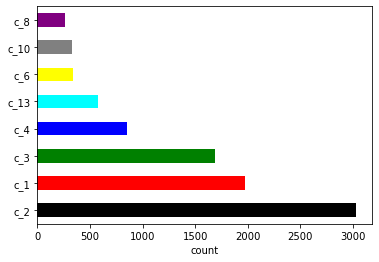

In [115]:
data['A'].value_counts().head(8).plot(kind = 'barh', color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'gray', 'purple', 'orange', 'brown'])
plt.xlabel('count')
plt.show()

In [116]:
# replace least frequent values to one category to minimize the number of dummy veraibles
n = 11
top_11_A = data['A'].value_counts().index.tolist()[:n]
A_feature = data['A'].to_list()
len_A_feature = len(A_feature)
for i in range(len_A_feature):
     if A_feature[i] not in top_11_A:
        A_feature[i] = 'c_Other'
data['A'] = A_feature

In [117]:
data = pd.get_dummies(data, prefix=['A'], columns = ['A'], drop_first=True)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]
data.shape

(9756, 62)

In [118]:
# replace least frequent values to one category to minimize the number of dummy veraibles
n = 11
top_11_A = test_data['A'].value_counts().index.tolist()[:n]
A_feature = test_data['A'].to_list()
len_A_feature = len(A_feature)
for i in range(len_A_feature):
     if A_feature[i] not in top_11_A:
        A_feature[i] = 'c_Other'
test_data['A'] = A_feature

In [119]:
test_data = pd.get_dummies(test_data, prefix=['A'], columns = ['A'], drop_first=True)
test_data.shape

(1851, 61)

In [120]:
data.head(5)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Weekend,B,user_type_Other,user_type_Returning_Visitor,C_200.0,C_202.0,C_400.0,C_404.0,C_8080.0,Region_2.0,Region_3.0,Region_4.0,Region_5.0,Region_6.0,Region_7.0,Region_8.0,Region_9.0,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,internet_browser_Unknown_browser,internet_browser_chrome_80,internet_browser_chrome_89,internet_browser_chrome_90.1.7,internet_browser_chrome_98.0.1,internet_browser_chrome_99.1.3,internet_browser_chrome_99.1.4,internet_browser_safari_14,internet_browser_safari_14.1,internet_browser_safari_15,internet_browser_safari_15.4,A_c_10,A_c_11,A_c_13,A_c_2,A_c_3,A_c_4,A_c_5,A_c_6,A_c_8,A_c_9,A_c_Other,purchase
0,0,0.0,0.0,0.0,0.000000,1.0,0.000000,357.990337,0.200000,0.200000,0.0,0.0,1.0,False,118.880094,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.200000,0.200000,0.0,0.0,4.0,False,113.358423,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,0.0,0.0,0.0,34.323813,18.0,627.500000,627.500000,0.020000,0.050000,0.0,0.0,3.0,True,121.507695,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,0.0,0.0,0.0,0.000000,19.0,154.216667,154.216667,0.015789,0.024561,0.0,0.0,2.0,False,93.747176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,0.0,0.0,0.0,0.000000,1.0,0.000000,357.990337,0.200000,0.200000,0.0,0.4,2.0,False,99.545824,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Before dealing with dimentionality reduction, we will devide the data to x train and y train:

In [121]:
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1]

In [122]:
X_test = test_data.iloc[:,:].values

## Dealing with Normalization

In our data, some of the features are normalize and some aren't. Data normalization is the method of organizing data to appear similar across all records and fields. Performing so always results in getting higher quality data and better results. This process basically includes eliminating unstructured data and duplicates in order to ensure logical data storage. 

normalize all features to be between 0 and 1 by reducing the minimal value and dividing by the max (according to train distribution)

In [123]:
scaler = MinMaxScaler()
X_train_normalize = scaler.fit_transform(X_train)

In [124]:
X_test_normalize = scaler.fit_transform(X_test)

normalize to have 0 mean and 1 variance (according to train distribution) - Not in use in the project. The reason is because when we tried to find the optimal features based on this normalization we've got higher dimention both in the forward selection and PCA. It is also worth meantioning that we used the MinMaxScaler function beacause we already dealt with it sensativity to outliers before we use it.

In [125]:
#scaler = StandardScaler()
#X_train_normalize = scaler.fit_transform(X_train)

In [126]:
#X_test_normalize = scaler.transform(X_test)

## Dealing with Dimentionality 

In [127]:
data.shape

(9756, 62)

In [128]:
test_data.shape

(1851, 61)

We can see that by now, after dealing with dummy veriables we arrived at 61 dimentions for the features. 

The dimentionality is Not necessarily a problem. In class, we've learnd that the number of observations has to be atleast squered the number of features (that is the case in our data).
In general, we would prefer not to have a very large amount of features to avoid overfitting and complexity problems.

High dimensionality can significantly affect our model because more features make each sample more unique. Moreover, When we have too many features, observations become harder to cluster or differentiate. Too many dimensions causes every observation in our dataset to appear equidistant from all the others.

In order to find whether the dimentionality of the problem is high or not, in the "Dimentionality reduction process" part we will perform feature selection and PCA to find out if it is a problem. And then, we will choose the best method based on the results of each method.

## Dimentionality reduction process


### Forward Selection

$ C_p= MSE+2\frac{d+1}{n}\hat{\sigma}^2$ <br><br>
Where : $ \hat{\sigma}^2 = \frac{RSS_{all features}}{n-\#features-1} $,   and $\#features$ is the number of all features

Feature Selection with Logistic Regression:

In [129]:
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
    reg  = LogisticRegression()
    reg.fit(X, y)
    y_preds = reg.predict(X)
    MSE = mean_squared_error(y, y_preds)
    RSS = MSE * len(X)
    sigma_hat_squared = RSS / (len(X) - len(X[1]) - 1)
    return sigma_hat_squared

In [130]:
def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float:
    reg  = LogisticRegression() 
    reg.fit(X, y)
    preds = reg.predict(X)
    MSE = mean_squared_error(y, preds)
    d = X.shape[1]
    n = len(X)
    Cp = MSE + (2* sigma_hat_squared * (d + 1)) / n
    return Cp

In [131]:
def add_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict:
    best_score = np.inf
    num_of_features = X.shape[1]
    for i in range(num_of_features):
        if i in current_features:
            continue
        current_features_copy_added_feature = current_features.copy()
        current_features_copy_added_feature.append(i)
        current_features_copy_added_feature.sort()
        current_Cp = get_mallows_cp_score(X[:, current_features_copy_added_feature], y, sigma_hat_squared) 
        if (current_Cp <= best_score):
            best_score = current_Cp
            best_features_lst = current_features_copy_added_feature
      
    return {'features':sorted(best_features_lst),'score':best_score}  

In [132]:
def forward_selection(X: np.array, y: np.array) -> List[int]:
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst, 'g')
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

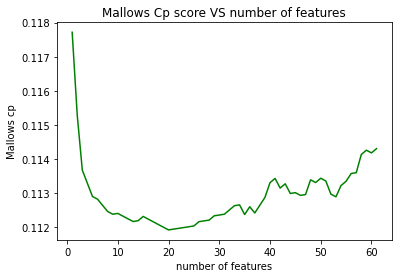

number of selected features by forward: 20
best features by forward: [9, 10, 16, 26, 27, 31, 32, 33, 37, 39, 40, 41, 42, 43, 44, 48, 50, 51, 56, 59]


In [133]:
best_features_list = forward_selection(X_train_normalize, y_train)
print(f'number of selected features by forward: {len(best_features_list)}')
print(f'best features by forward: {best_features_list}')

### PCA 
The function will return the minimal group of components, which explain more than (100*0.95)% of the variance.

In [134]:
def get_principal_components(X: np.array) -> np.array:
    pca = PCA(n_components = X.shape[1], whiten=True)
    pca.fit_transform(X)
    plt.bar(range(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
    plt.title("Cumulitive Explained variance per eigenvector")
    plt.xlabel("number of features")
    plt.ylabel("percentage")
    plt.show()

    pca = PCA(0.95, whiten=True)
    data = pca.fit_transform(X)
    print("For explained variance:", 0.99, "number of components/dimentions:", data.shape[1])
    return pca.components_

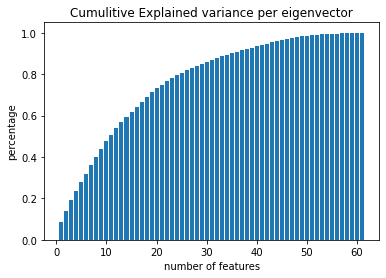

For explained variance: 0.99 number of components/dimentions: 43


In [135]:
best_components_list = get_principal_components(X_train_normalize)

### Comparison between forward selection and PCA

In [136]:
# calculate the test MSE for each reduced dataset
X_forward_reduced_train = X_train_normalize[:, best_features_list]

# get components based on train set:
X_pca_train = np.dot(X_train_normalize, best_components_list.T)
#x_pca_test = np.dot(X_test, train_components.T)

#### Results
Using these new datasets, we will now print the train mse of each model:

In [137]:
Lreg_forward = LogisticRegression().fit(X_forward_reduced_train, y_train)
Lreg_pca = LogisticRegression().fit(X_pca_train, y_train)

reg_forward_predict_train = Lreg_forward.predict(X_forward_reduced_train)
#reg_forward_predict_test = reg_forward.predict(x_forward_reduced_test)
reg_pca_predict_train = Lreg_pca.predict(X_pca_train)
#reg_pca_predict_test = reg_pca.predict(x_pca_test)

train_mse_forward = mean_squared_error(y_train, reg_forward_predict_train)
#test_mse_forward = mean_squared_error(y_test, reg_forward_predict_test)
train_mse_pca = mean_squared_error(y_train, reg_pca_predict_train)
#test_mse_pca = mean_squared_error(y_test, reg_pca_predict_test)

print(f'MSE train - PCA: {round(train_mse_pca,4)}')
#print(f'MSE test - PCA: {round(test_mse_pca,4)}')
print(f'MSE train - forward: {round(train_mse_forward,4)}')
#print(f'MSE test - forward: {round(test_mse_forward,4)}')

MSE train - PCA: 0.1454
MSE train - forward: 0.1114


Choosing the best method to reduce dimentionality - 

In our case, forward selection got better results (smaller train MSE), using less features (20), having the original meaning of the features (compare to th PCA that probably lost a lot of information that causes the tradeoff between information loss and dimentionality reduction to tends more to the side of information loss than the Forward selection). Therfore it seems better to use forward selection for this dataset, if we were to use Logistic Regression. <br>

It is also important mentioning that we used a forward selection algorithm based on Logistic Regression Model for every one of our 4 Models that we will implement in the next section. The reason is because the of the high running time that takes for implement feature selection for every one of our models. We also want to mention that we are aware that if we would impement forward selection for evey model seperatly (and not based only on the Logistic Regression) obviously we would get better results on the other 3 models (apart from the Logistic Regression model).

In [138]:
X_train_before_split = X_forward_reduced_train
y_train_before_split = y_train.copy()
data_reduction = data.iloc[:, best_features_list]
X_Test = X_test_normalize[:, best_features_list]

## Construction of new features and/or mathematical manipulation of existing features


For the new features we created, we created a few dummy veraibles from the original multi categorial features. In addition, we used the MinMax Scaler function (mathematical manipulation on the existing features).

## Apply the pre-processing to the Test-set

The pre prosessing on the test data is done together with the train set earlier

# Part 3 & 4 - Modeling & Model evaluation

Split the data to train and validation in order to test the success of our models:

In [139]:
X_Train, X_val, y_Train, y_val = train_test_split(X_train_before_split, y_train_before_split, test_size = 0.2, random_state= 42, shuffle=True)

### Support Vectors Machine

In [140]:
warnings.filterwarnings('ignore')

parameters = {'kernel':['rbf', 'poly'], 'C':[0.01,0.1,1,10], 'gamma':['scale','auto']}
KF = KFold(n_splits = 5, shuffle = True, random_state=42)
clf = svm.SVC(random_state = 0)
grid_search_svm = GridSearchCV(clf, parameters, cv = KF, scoring = 'roc_auc')
grid_search_svm.fit(X_Train, y_Train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='roc_auc')

In [141]:
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
print(f'Best Params: {best_params_svm} \n')
print(f'Train AUC score for best params: {best_score_svm}')

Best Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 

Train AUC score for best params: 0.8841939543646122


K-fold cross validation and ROC curve on every K-fold, after getting the best parameters:

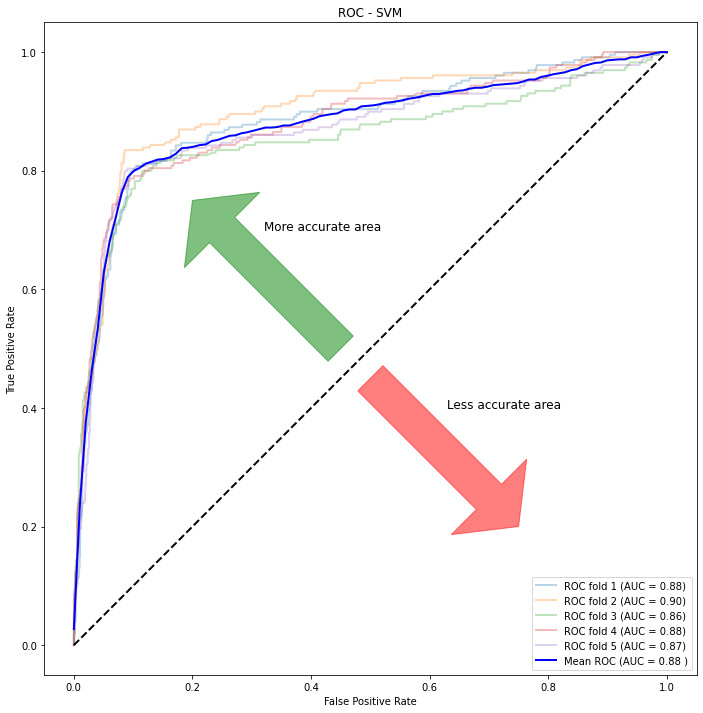

In [142]:
random_state = np.random.RandomState(0)
clf_svm = svm.SVC(**best_params_svm, random_state=random_state, probability=True)
cv = StratifiedKFold(n_splits=5,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
X_Train_pd = pd.DataFrame(X_Train)
y_Train_pd = pd.Series(y_Train)

for train,test in cv.split(X_Train_pd, y_Train_pd):
    prediction = clf_svm.fit(X_Train_pd.iloc[train],y_Train_pd.iloc[train]).predict_proba(X_Train_pd.iloc[test])
    fpr, tpr, t = roc_curve(y_Train_pd.iloc[test], prediction[:,1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Differences in performance between the Train and the Validation data:

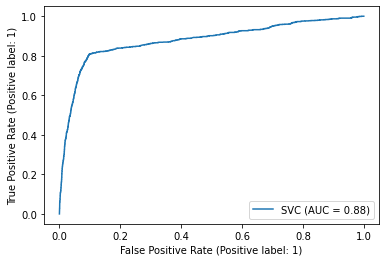

In [143]:
warnings.filterwarnings('ignore')

metrics.plot_roc_curve(clf_svm, X_Train, y_Train)
plt.show()

Conclusions from the differences between the Train and Validation (Overfitting):<br>
Based on the SVM model, we have got Train And test AUC of 0.88. Therefore, this model is not overfitted.


Visualization of SVM with RBF kernel on our data:

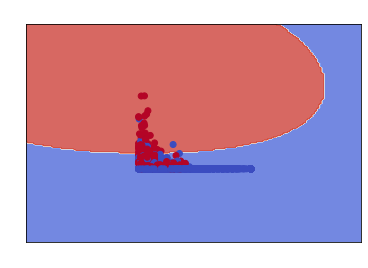

In [144]:
X = X_Train[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset                 
y = y_Train

h = .02  # step size in the mesh

# We do not scale our data since we want to plot the support vectors
C = 1.0  # SVM regularization choosen parameter from earlier
rbf_svc = svm.SVC(**best_params_svm, random_state=random_state, probability=True).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
     
# Plot the decision boundary. For that, we will assign a color to each
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length', color='w', fontsize=15)
plt.ylabel('Sepal width', color='w', fontsize=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM with RBF kernel', color='w', fontsize=15)
plt.show()

By looking at the visualization of the SVM with RBF Kernel (2 Dim) we can see that in a approximate most of the observations where classify correctly.

### Random Forest or Adaptive Boosting

In [145]:
warnings.filterwarnings('ignore')

parameters = {'n_estimators':[180, 190, 200], 'criterion':['entropy', 'gini'], 'max_depth': [70, 80, 90], 'min_samples_leaf':[1,2], 'min_samples_split':[3,5]}
KF = KFold(n_splits = 5, shuffle = True, random_state=42)
clf_rf = RandomForestClassifier(random_state = 0)
grid_search_rf = GridSearchCV(clf_rf, parameters, cv = KF, scoring = 'roc_auc')
grid_search_rf.fit(X_Train, y_Train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [70, 80, 90], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 5],
                         'n_estimators': [180, 190, 200]},
             scoring='roc_auc')

In [146]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f'Best Params: {best_params_rf} \n')
print(f'Train AUC score for best params: {best_score_rf}')

Best Params: {'criterion': 'gini', 'max_depth': 70, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200} 

Train AUC score for best params: 0.8954007206192494


K-fold cross validation and ROC curve on every K-fold, after getting the best parameters:

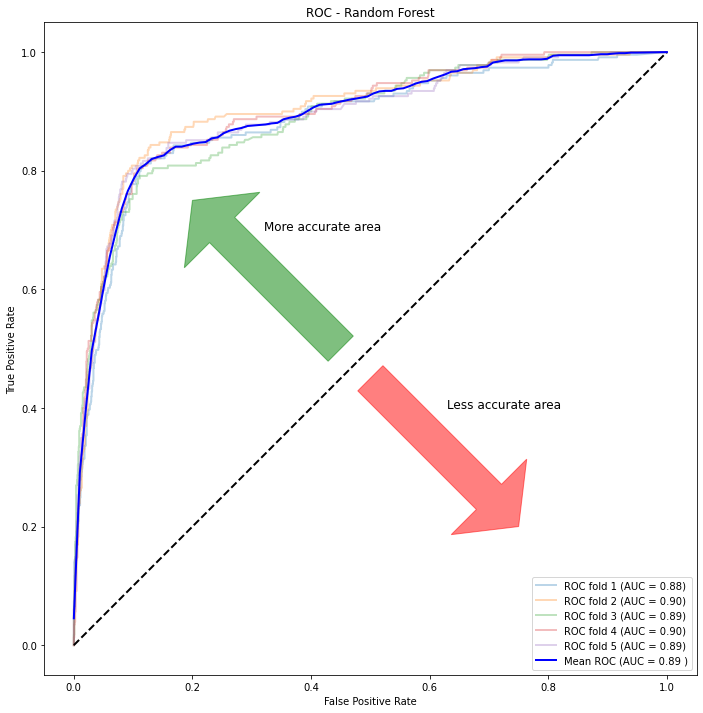

In [147]:
random_state = np.random.RandomState(0)
clf_rf = RandomForestClassifier(**best_params_rf, random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
X_Train_pd = pd.DataFrame(X_Train)
y_Train_pd = pd.Series(y_Train)
for train,test in cv.split(X_Train, y_Train):
    prediction = clf_rf.fit(X_Train_pd.iloc[train],y_Train_pd.iloc[train]).predict_proba(X_Train_pd.iloc[test])
    fpr, tpr, t = roc_curve(y_Train_pd.iloc[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Feature importance:

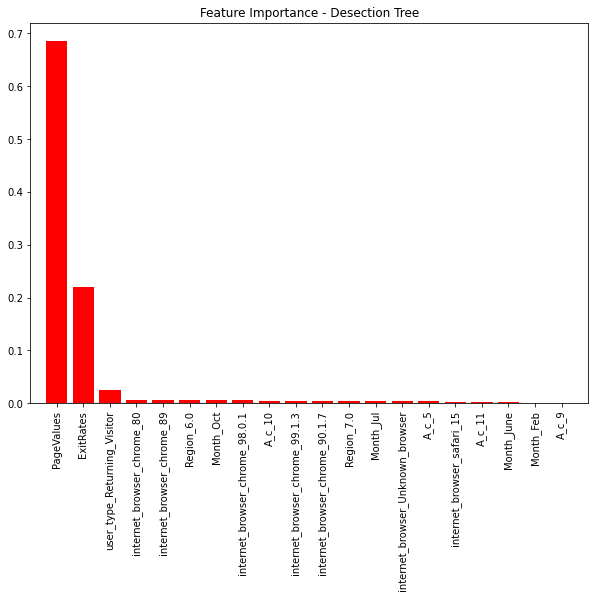

Feature ranking:
1. PageValues (68.59%)
2. ExitRates (21.94%)
3. user_type_Returning_Visitor (2.43%)
4. internet_browser_chrome_80 (0.59%)
5. internet_browser_chrome_89 (0.59%)
6. Region_6.0 (0.57%)
7. Month_Oct (0.54%)
8. internet_browser_chrome_98.0.1 (0.53%)
9. A_c_10 (0.52%)
10. internet_browser_chrome_99.1.3 (0.51%)
11. internet_browser_chrome_90.1.7 (0.50%)
12. Region_7.0 (0.46%)
13. Month_Jul (0.43%)
14. internet_browser_Unknown_browser (0.38%)
15. A_c_5 (0.36%)
16. internet_browser_safari_15 (0.34%)
17. A_c_11 (0.29%)
18. Month_June (0.24%)
19. Month_Feb (0.14%)
20. A_c_9 (0.04%)


In [148]:
R_F_model = clf_rf.fit(X_Train, y_Train)
importances = R_F_model.feature_importances_
desc_indices = np.argsort(importances)[::-1]
names = []
for i in desc_indices:
    names.append(data_reduction.columns[i])

plt.figure(figsize=(10,7))
plt.title("Feature Importance - Desection Tree")
plt.bar(range(X_Train.shape[1]), importances[desc_indices], color='r', align='center')
plt.xticks(range(X_Train.shape[1]), names, rotation='vertical')
plt.xlim([-1, X_Train.shape[1]])
plt.show()

# Print the feature ranking
print("Feature ranking:")
for i, feature in enumerate(data_reduction.columns[desc_indices]):
    print(("{}. {} ({:.2f}%)").format(i+1, feature, importances[desc_indices][i]*100))

Feature importance conclusions - Random Forest

We can see that we have two main features that contibute the most to our Random Forest Model. The first one is PageValues and the second one is ExitRates. Our intuition to why these features most important is because PageValues represents the average value for a page that a user visited right before he got to his goal page or made an ecommerce transaction. Our intuition for the second one is that it makes sense that someone has left the website and it depends on the page he was on (a page that he made a purchase or just left the site - tells us a lot about about purchases)

Visualization of the Random Forest Classifier Model -

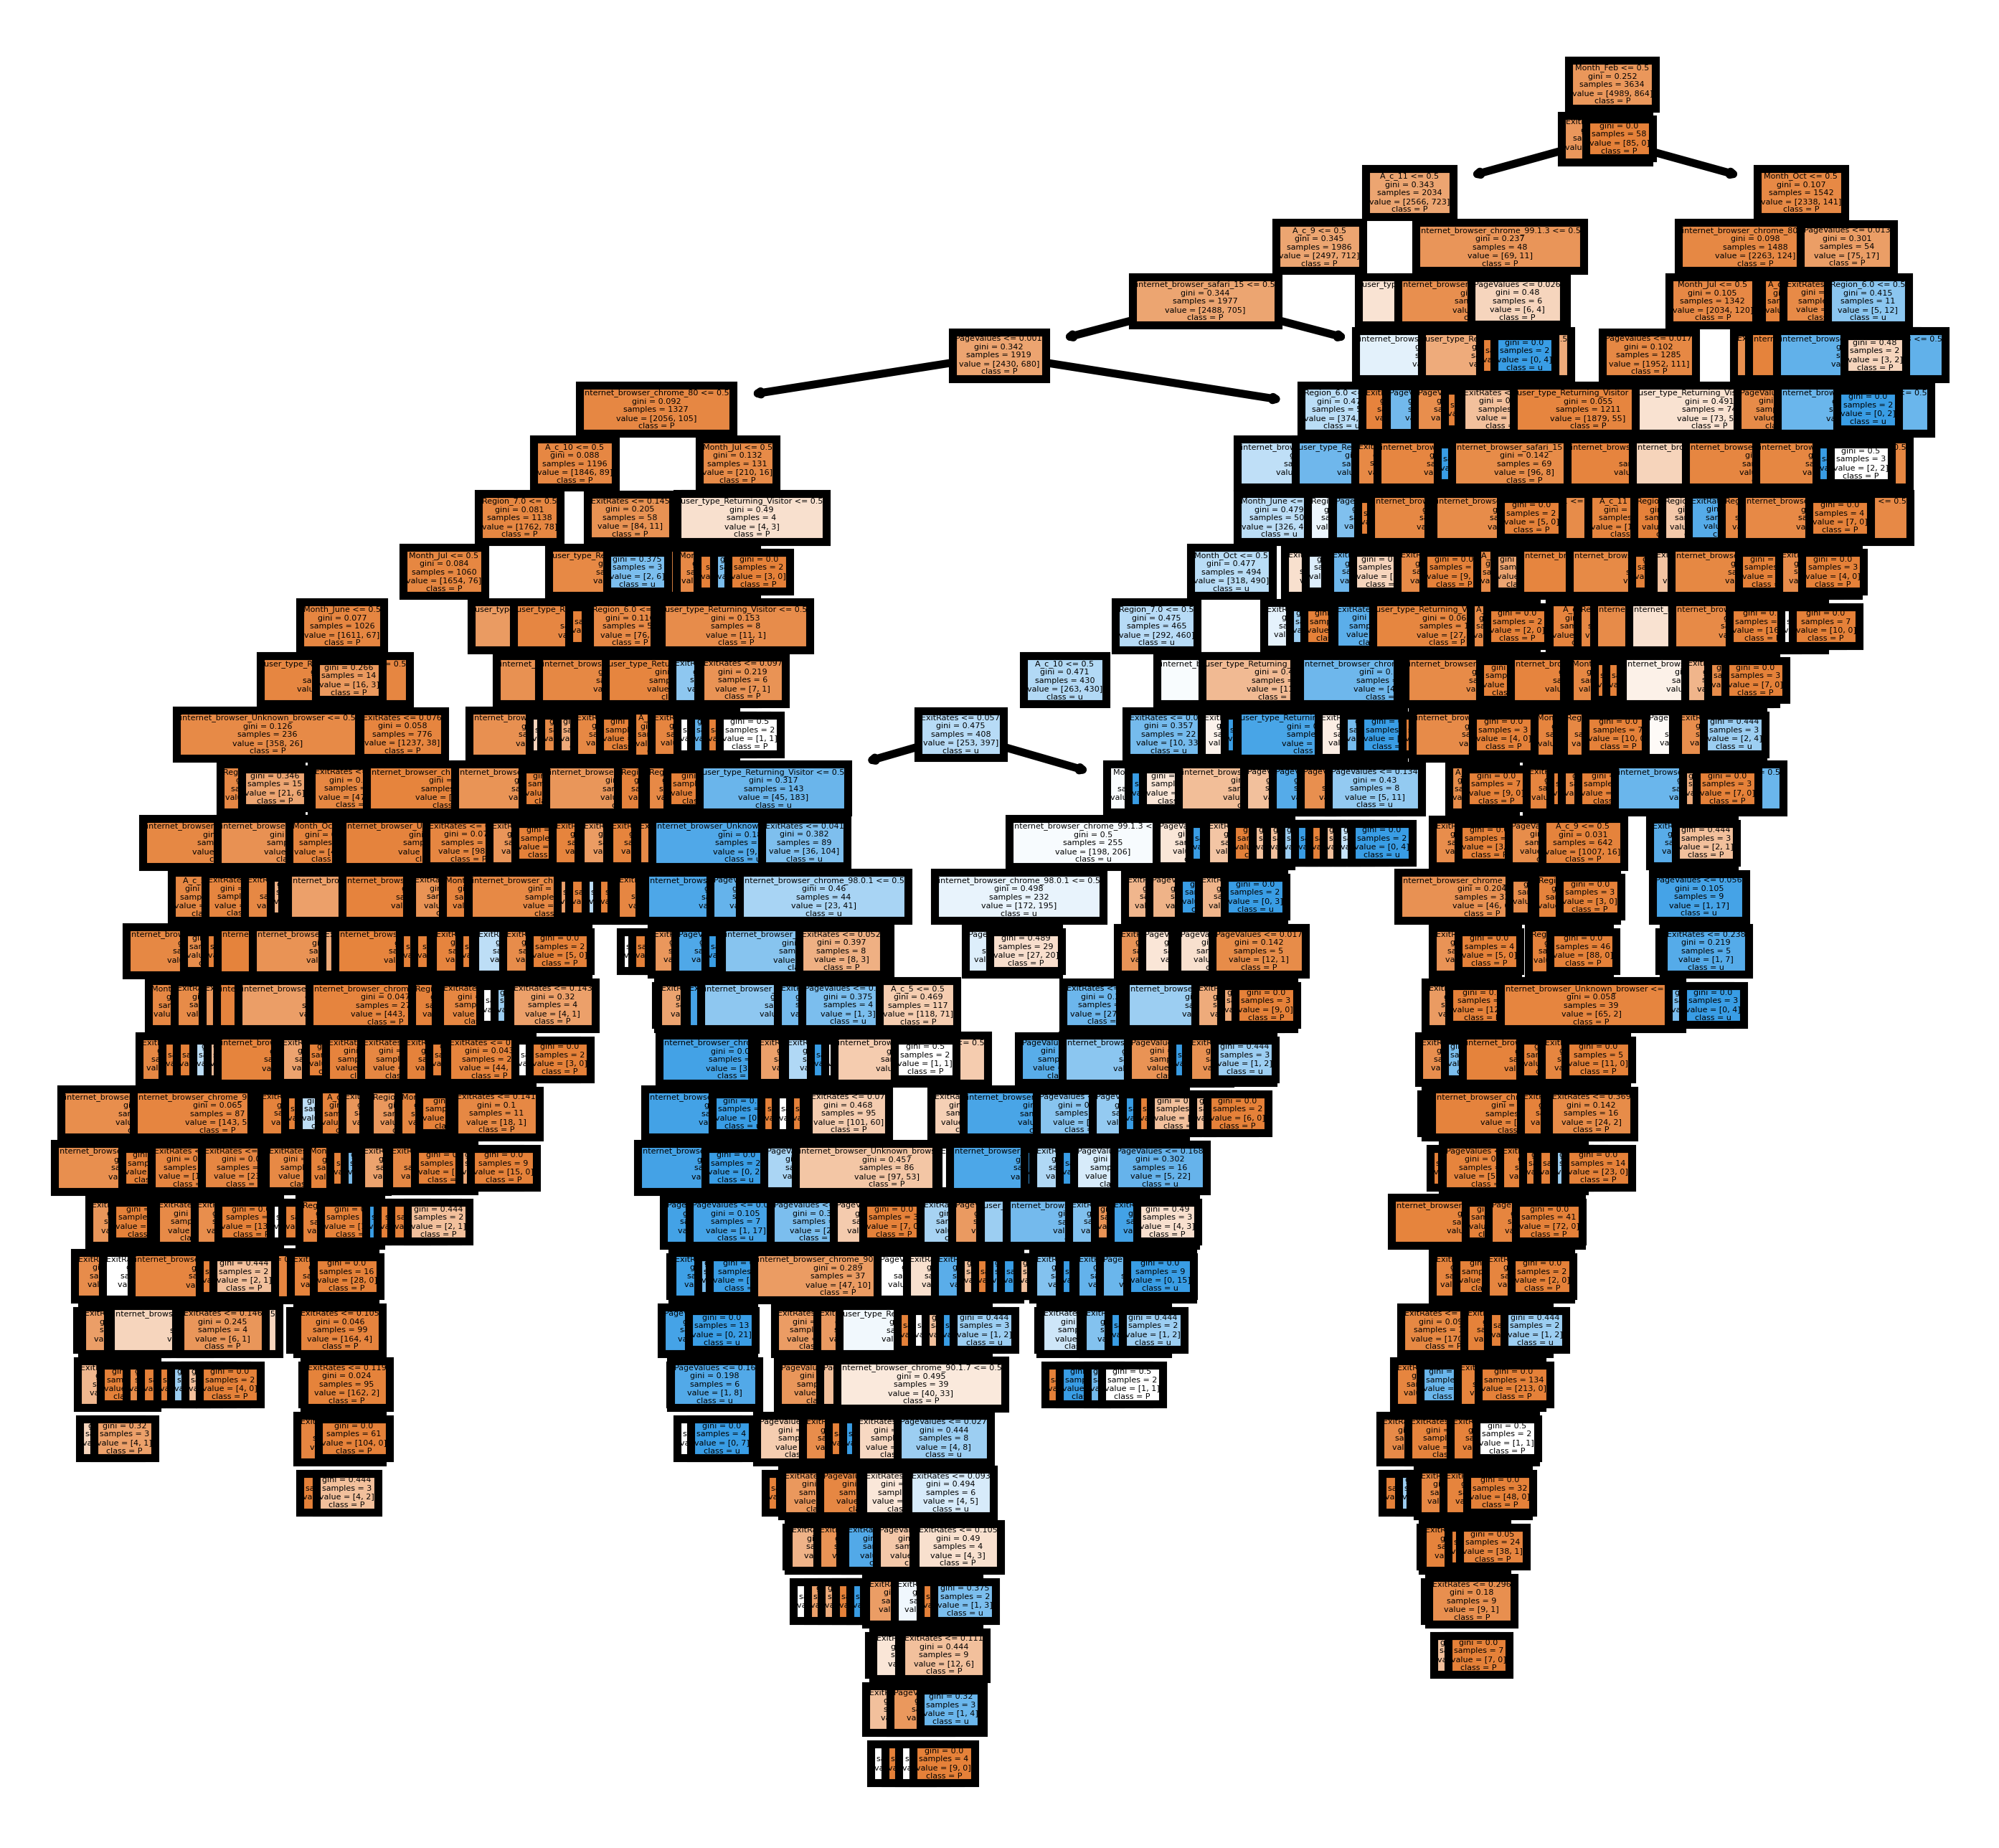

In [149]:
from sklearn import tree

# Arrange Data into Features Matrix and Target Vector
X = X_Train
y = y_Train

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(**best_params_rf).fit(X_train, Y_train)
                          
fn=data_reduction.columns
cn='Purchase'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

By the Tree plot we can see that Random forest works on several decision tree. Plotting them gives a hunch basically how a model predicts the value of a target variable by learning simple decision rules inferred from the data features. Every decision at a node is made by classification using single feature from our train data.

### Logistic Regression

In [150]:
parameters = {'penalty':['l1','l2'], 'solver':['saga']}
KF = KFold(n_splits = 5, shuffle = True, random_state=42)
clf = LogisticRegression(random_state = 0)
grid_search_lr = GridSearchCV(clf, parameters, cv = KF, scoring = 'roc_auc')
grid_search_lr.fit(X_Train, y_Train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='roc_auc')

In [151]:
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print(f'Best Params: {best_params_lr} \n')
print(f'Train AUC score for best params: {best_score_lr}')

Best Params: {'penalty': 'l1', 'solver': 'saga'} 

Train AUC score for best params: 0.8766780542752924


K-fold cross validation and ROC curve on every K-fold, after getting the best parameters:

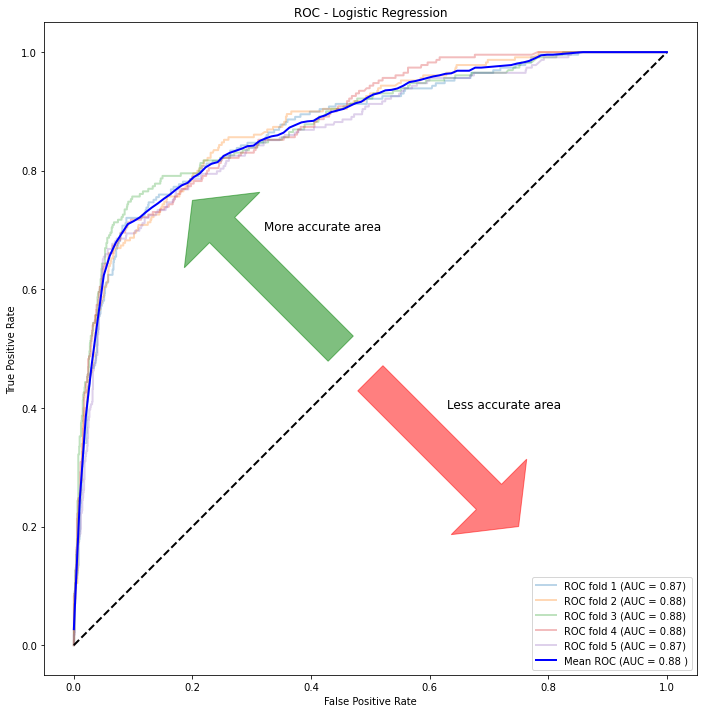

In [152]:
random_state = np.random.RandomState(0)
clf_lr = LogisticRegression(**best_params_lr, random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
X_Train_pd = pd.DataFrame(X_Train)
y_Train_pd = pd.Series(y_Train)
for train,test in cv.split(X_Train_pd, y_Train):
    prediction = clf_lr.fit(X_Train_pd.iloc[train],y_Train_pd.iloc[train]).predict_proba(X_Train_pd.iloc[test])
    fpr, tpr, t = roc_curve(y_Train_pd.iloc[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Feature importance:

Feature: 0, Score: -4.34650
Feature: 1, Score: 28.82282
Feature: 2, Score: -0.23203
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02114
Feature: 5, Score: -1.70018
Feature: 6, Score: 0.05831
Feature: 7, Score: -0.18114
Feature: 8, Score: 0.22818
Feature: 9, Score: -0.46307
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.06615
Feature: 12, Score: -0.00650
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.12812
Feature: 15, Score: -0.01650
Feature: 16, Score: 0.40116
Feature: 17, Score: 0.40548
Feature: 18, Score: 0.12654
Feature: 19, Score: 0.00000


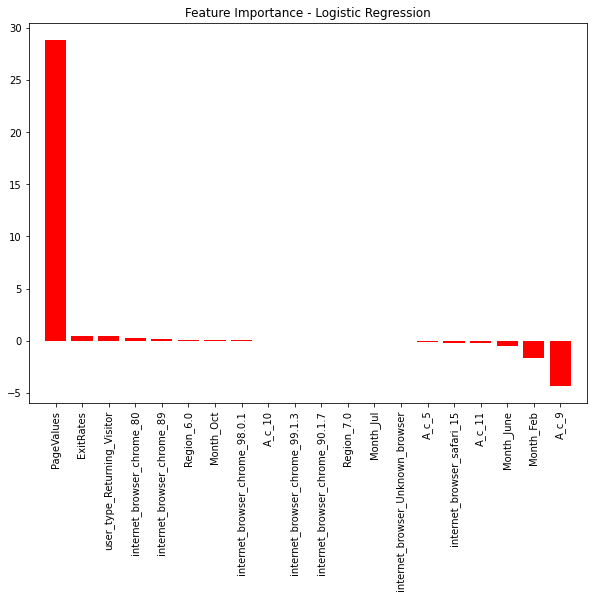

In [153]:
clf_lr = LogisticRegression(**best_params_lr)
logistic_regression = clf_lr.fit(X_Train, y_Train)
importances = logistic_regression.coef_[0]
desc_indices = np.argsort(importances)[::-1]
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importances))], importances)

plt.figure(figsize=(10,7))
plt.title("Feature Importance - Logistic Regression")
plt.bar(range(X_Train.shape[1]), importances[desc_indices], color='r', align='center')
plt.xticks(range(X_Train.shape[1]), names, rotation='vertical')
plt.xlim([-1, X_Train.shape[1]])
plt.show()

Differences in performance between the Train and the Validation data:

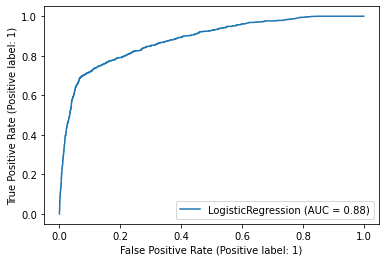

In [154]:
import warnings
warnings.filterwarnings('ignore')

metrics.plot_roc_curve(clf_lr, X_Train, y_Train)
plt.show()

Conclusions from the differences between the Train and Validation (Overfitting):<br>
Based on the SVM model, we have got Train And test AUC of 0.88. Therefore, this model is not overfitted.

### KNN

In [155]:
import warnings
warnings.filterwarnings('ignore')

parameters = {'n_neighbors':[1,3,5], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2, 'l_p']}
KF = KFold(n_splits = 5, shuffle = True, random_state=42)
clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(clf, parameters, cv = KF, scoring = 'roc_auc')
grid_search_knn.fit(X_Train, y_Train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5], 'p': [1, 2, 'l_p']},
             scoring='roc_auc')

In [156]:
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print(f'Best Params: {best_params_knn} \n')
print(f'Train AUC score for best params: {best_score_knn}')

Best Params: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1} 

Train AUC score for best params: 0.797733171102035


K-fold cross validation and ROC curve on every K-fold, after getting the best parameters:

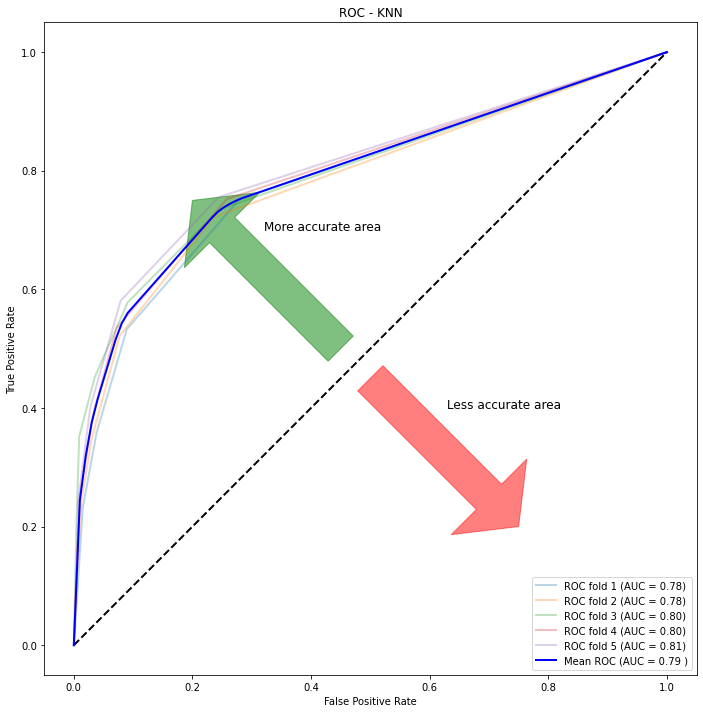

In [157]:
clf_knn = KNeighborsClassifier(**best_params_knn)
cv = StratifiedKFold(n_splits=5,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
X_Train_pd = pd.DataFrame(X_Train)
y_Train_pd = pd.Series(y_Train)
for train,test in cv.split(X_Train, y_Train):
    prediction = clf_knn.fit(X_Train_pd.iloc[train],y_Train_pd.iloc[train]).predict_proba(X_Train_pd.iloc[test])
    fpr, tpr, t = roc_curve(y_Train_pd.iloc[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Differences in performance between the Train and the Validation data:

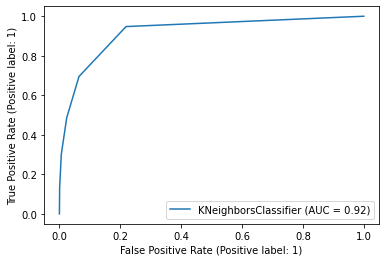

In [158]:
import warnings
warnings.filterwarnings('ignore')

metrics.plot_roc_curve(clf_knn, X_Train, y_Train)
plt.show()

Conclusions from the differences between the Train and Validation (Overfitting):<br>
We can see a clear difference between those AUC's. The Validation set AUC is 0.79 and Train set AUC is 0.92. That is why we can assume that our Model is not necessarily, but might be Overfitted.<br>
In order to increse the Model's ability to generalize it's predictions we used methods to decrese dimentionality, normalize the data and also used K-fold cross validation to check the accuracy of our model.


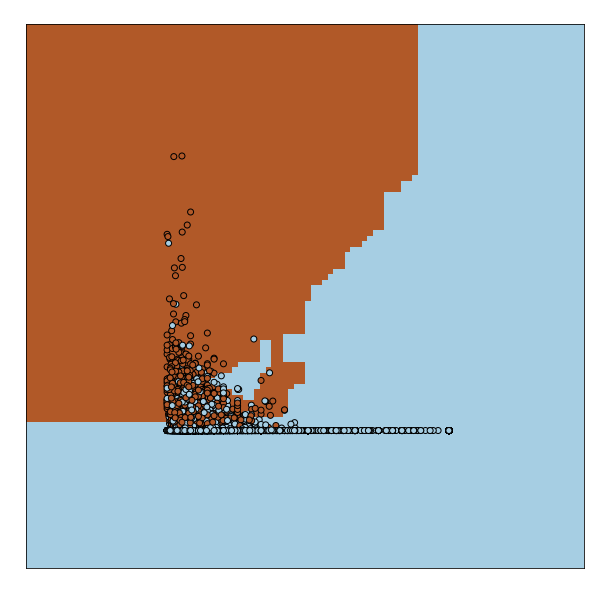

In [159]:
X = X_Train[:, :2] # we only take the first two features. 
Y = y_Train

clf_knn = KNeighborsClassifier(**best_params_knn).fit(X, Y)


# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(10, 10))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1], c=Y, ec='k')
pl.xlabel('Sepal length', color='w', fontsize=15)
pl.ylabel('Sepal width', color='w', fontsize=15)
plt.title('2NN', color='w', fontsize=15)

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

By looking at the visualization of the 2NN we can see that in a approximate most of the observations where classify correctly.

### Choosing the best Model - <br>
based om the Train AUC of every model, we can see that The Train AUC of Random Forest Model is the highest. Therefore, we will choose this model to best represent our results.

Confusion Matrix on the Random Forest Model with the validation data in order to evaluate our model:

Validation confusion Matrix:


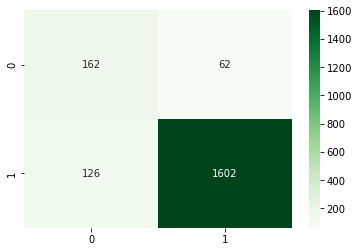

Validation Accuracy: 0.9036885245901639


In [160]:
# Using seaborn
RF_train_predict = grid_search_rf.predict(X_val)
C_m = confusion_matrix(y_val, RF_train_predict)
tn, fp, fn, tp = C_m.ravel()
C_m = np.array([[tp,fp],[fn,tn]])

print("Validation confusion Matrix:")
sns.heatmap(C_m, annot=True, fmt='g', cmap='Greens', xticklabels = [0,1], yticklabels = [0,1])
plt.show()

print("Validation Accuracy:", (tp+tn) / C_m.sum())

Explenation of the Confusion Matrix:

We can see that 1602 observations were labeled as TN (we predicted negetive, and there were actual negetive), 162 AS TP, 62 as FP and 126 as FN. <br>
So, we can assume that based on our Random Forest Model we can make very accurate predictions on whether sessions in the site were end in purshase or not. 


Now, we will show the difference between the Train data and the Validation data on the ROC AUC curve:

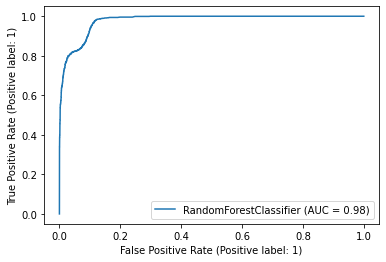

In [161]:
import warnings
warnings.filterwarnings('ignore')

metrics.plot_roc_curve(clf_rf, X_Train, y_Train)
plt.show()

Conclusions from the differences between the Train and Validation (Overfitting):<br>

We can see a clear difference between those AUC's. The Validation set AUC is 0.89 and Train set AUC is 0.98. That is why we can assume that our Model is not necessarily, but might be Overfitted.<br>
In order to increse the Model's ability to generalize it's predictions we used methods to decrese dimentionality, normalize the data and also used K-fold cross validation to check the accuracy of our model.

# Part 5 - Performing a Prediction

Functions that we will use in the Pipeline:

In [162]:
def fill_na_by_mean (feature_by, feature_fill, data):
    feature_by_median = data[feature_by].median()
    feature_fill_half1 = data[data[feature_by] < feature_by_median][feature_fill].mean()
    feature_fill_half2 = data[data[feature_by] >= feature_by_median][feature_fill].mean()
    data.loc[data[feature_by] < feature_by_median, feature_fill] = \
        data.loc[data[feature_by] < feature_by_median, feature_fill].fillna(feature_fill_half1)
    data.loc[data[feature_by] >= feature_by_median, feature_fill] = \
        data.loc[data[feature_by] >= feature_by_median, feature_fill].fillna(feature_fill_half2)
    return data

In [163]:
def fill_na_by_median (feature_by, feature_fill, data):
    feature_by_mean = data[feature_by].mean()
    feature_fill_half1 = data[data[feature_by] < feature_by_mean][feature_fill].median()
    feature_fill_half2 = data[data[feature_by] >= feature_by_mean][feature_fill].median()
    data.loc[data[feature_by] < feature_by_mean, feature_fill] = \
        data.loc[data[feature_by] < feature_by_mean, feature_fill].fillna(feature_fill_half1)
    data.loc[data[feature_by] >= feature_by_mean, feature_fill] = \
        data.loc[data[feature_by] >= feature_by_mean, feature_fill].fillna(feature_fill_half2)
    return data

In [164]:
def dummies_data (feature, data):
    data = pd.get_dummies(data, prefix=[feature], columns = [feature], drop_first=True)
    ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
    data = data[ordered_cols]
    return data

In [165]:
def dummies_test_data (feature, test_data):
    return pd.get_dummies(test_data, prefix=[feature], columns = [feature], drop_first=True)

In [166]:
## drop the top 1% of the observations due to them being outliers:
def drop_one_percentage (feature, data):
    data.drop(data.loc[data[feature] > data[feature].quantile(0.99)].index, inplace=True)
    return data

In [167]:
# forward fill NA:
def forward_fill_NA(feature, data):
    data[feature].fillna(method='ffill', inplace=True)
    return data

In [168]:
def RandomForestClassifier_Function(best_params, X_Train, y_Train):
    random_state = np.random.RandomState(0)
    model = RandomForestClassifier(**best_params, random_state=random_state)
    model.fit(X_Train, y_Train)
    return model

## Pipeline - 

In [169]:
import warnings
warnings.filterwarnings('ignore')

def Pipeline (data, test_data):

    # Part 2 - Data Preparation / Preprocessing ------------------------------------------------------------------------

    # Some of the features that resemble Numeric type, but where saved in our data as Object type.
    # Now we will change them to Numeric type to make better predictions in our model.
    # In addition, removing unnecessary strings from some of the features in order to convert their type to Numeric (the same for test data):
    data['C'] = data['C'].str.replace("log_", "")
    data['C'] = data['C'].str.replace("log", "")
    test_data['C'] = test_data['C'].str.replace("log_", "")
    test_data['C'] = test_data['C'].str.replace("log", "")

    data['product_page_duration'] = data['product_page_duration'].str.replace("minutes", "")
    test_data['product_page_duration'] = test_data['product_page_duration'].str.replace("minutes", "")
    data['info_page_duration'] = data['info_page_duration'].str.replace("minutes", "")
    test_data['info_page_duration'] = test_data['info_page_duration'].str.replace("minutes", "")

    # Converting the type of the features 
    data['C'] = data['C'].astype('float')
    test_data['C'] = test_data['C'].astype('float')
    data['product_page_duration'] = data['product_page_duration'].astype('float')
    test_data['product_page_duration'] = test_data['product_page_duration'].astype('float')
    data['info_page_duration'] = data['info_page_duration'].astype('float')
    test_data['info_page_duration'] = test_data['info_page_duration'].astype('float')

    # Converting the type of column "Weekend" from object to bool for further use
    data['Weekend'] = data['Weekend'].astype('bool')
    test_data['Weekend'] = test_data['Weekend'].astype('bool')

    # Dealing with missing values ########################################################################################
    
    # First of all, we can see that the feature 'D' has 10,374 missing values out of 10,479 observations.
    # Therefore, we will get rid of this feature due to it's insignificancy in our model:
    data.drop(['D'], axis = 1, inplace=True)
    test_data.drop(['D'], axis = 1, inplace=True)

    # 'total_duration', 'num_of_product_pages' features and 'product_page_duration'
    num_of_product_pages_median = data['num_of_product_pages'].median()
    data['num_of_product_pages'].fillna(num_of_product_pages_median, inplace=True)
    test_data['num_of_product_pages'].fillna(num_of_product_pages_median, inplace=True)

    data = fill_na_by_mean('num_of_product_pages', 'total_duration', data) # fill_na_by_mean(feature_by, featur_fill)
    test_data = fill_na_by_mean('num_of_product_pages', 'total_duration', test_data)

    # There is a high correlation between 'num_of_product_pages' and 'product_page_duration'
    # as expected. Therefore, we will fill in the missing values for this feature in the same way we did in the 'total_duration' feature:
    data = fill_na_by_mean('num_of_product_pages', 'product_page_duration', data) 
    test_data = fill_na_by_mean('num_of_product_pages', 'product_page_duration', test_data)

    # 'user_type'
    data['user_type'].fillna("Returning_Visitor", inplace = True)
    test_data['user_type'].fillna("Returning_Visitor", inplace = True)

    # 'admin_page_duration' and num_of_admin_pages'
    admin_page_duration_mean = data['admin_page_duration'].mean()
    data['admin_page_duration'].fillna(admin_page_duration_mean, inplace=True)
    test_data['admin_page_duration'].fillna(admin_page_duration_mean, inplace=True)

    # The correlation between 'num_of_admin_pages' feature and 'admin_page_duration' feature is very high.
    # Therefore, we will fill the missing values in the 'num_of_admin_pages' feature by the median of every 2 categorial
    # product pages and fill the missing values in the 'admin_page_duration' feature by the mean of every 2 categorial product pages
    data = fill_na_by_median('admin_page_duration', 'num_of_admin_pages', data) 
    test_data = fill_na_by_median('admin_page_duration', 'num_of_admin_pages', test_data)

    # 'info_page_duration' and 'num_of_info_pages'


    info_page_duration_mean = data['info_page_duration'].mean()
    data['info_page_duration'].fillna(info_page_duration_mean, inplace=True)
    test_data['info_page_duration'].fillna(info_page_duration_mean, inplace=True)

    # We can see that the correlation between 'num_of_info_pages' feature and 'info_page_duration' feature is very high.
    # Therefore, we will fill the missing values in the 'num_of_info_pages' feature by the median of every 2 categorial
    # product pages and fill the missing values in the 'info_page_duration' feature by the mean of every 2 categorial product pages
    data = fill_na_by_median('info_page_duration', 'num_of_info_pages', data) 
    test_data = fill_na_by_median('info_page_duration', 'num_of_info_pages', test_data)


    # 'closeness_to_holiday' feature
    data['closeness_to_holiday'].fillna(0, inplace=True)
    test_data['closeness_to_holiday'].fillna(0, inplace=True)

    # 'device' feature
    data = forward_fill_NA('device', data)
    test_data = forward_fill_NA('device', test_data)
    
    # 'A' feature 
    data = forward_fill_NA('A', data)
    test_data = forward_fill_NA('A', test_data)

    # 'BounceRates' and 'ExitRates' features
    data = data.dropna(subset=['BounceRates', 'ExitRates'])
    test_data['BounceRates'].fillna(method='ffill', inplace=True)
    test_data['ExitRates'].fillna(method='ffill', inplace=True)

    # 'Month' feature
    data['Month'].fillna('May', inplace=True)
    test_data['Month'].fillna('May', inplace=True)

    # 'PageValues' feature
    data = forward_fill_NA('PageValues', data)
    test_data = forward_fill_NA('PageValues', test_data)

    # 'Region' feature
    data = forward_fill_NA('Region', data)
    test_data = forward_fill_NA('Region', test_data)

    # 'B' feature
    data = forward_fill_NA('B', data)
    test_data = forward_fill_NA('B', test_data)

    # 'C' feature
    data = forward_fill_NA('C', data)
    test_data = forward_fill_NA('C', test_data)

    # ''internet_browser'' feature
    data['internet_browser'].fillna('Unknown_browser', inplace=True)
    test_data['internet_browser'].fillna('Unknown_Value', inplace=True)


    # Dealing with outliers ############################################################################################

    # 'total_duration' and 'num_of_product_pages' features
    data = drop_one_percentage('total_duration', data)

    # 'B' feature
    data.drop(data.loc[data['B'] > data['B'].quantile(0.995)].index, inplace=True)
    data.drop(data.loc[data['B'] < data['B'].quantile(0.005)].index, inplace=True)

    # For the next features, based of the distribution of all the num of pages and duration features we have decided to
    # drop the top 1% of the observations due to them being outliers:
    data = drop_one_percentage('num_of_admin_pages', data)
    data = drop_one_percentage('num_of_info_pages', data)
    data = drop_one_percentage('admin_page_duration', data)
    data = drop_one_percentage('info_page_duration', data)
    data = drop_one_percentage('product_page_duration', data)

    # For all the other features we think that outlier removel is problematic and might demage the data.

    # Dealing with Dummi Veriables:

    # 'user_type' feature
    data = dummies_data('user_type', data)
    test_data = dummies_test_data('user_type', test_data)
  
    # 'C' feature
    data = dummies_data('C', data)
    test_data = dummies_test_data('C', test_data)

    # 'Region' feature
    data = dummies_data('Region', data)
    test_data = dummies_test_data('Region', test_data)

    # 'month' feature
    data = dummies_data('Month', data)
    test_data = dummies_test_data('Month', test_data)
    
    # 'internet browser' feature
    # replace least frequent values to one category to minimize the number of dummy veraibles
    n = 11
    top_11_browser = data['internet_browser'].value_counts().index.tolist()[:n]
    browser_feature = data['internet_browser'].to_list()
    len_browser_feature = len(browser_feature)
    for i in range(len_browser_feature):
        if browser_feature[i] not in top_11_browser:
            browser_feature[i] = 'Other_browser'
    data['internet_browser'] = browser_feature

    data = dummies_data('internet_browser', data)

    n = 11
    top_11_browser = test_data['internet_browser'].value_counts().index.tolist()[:n]
    browser_feature = test_data['internet_browser'].to_list()
    len_browser_feature = len(browser_feature)
    for i in range(len_browser_feature):
        if browser_feature[i] not in top_11_browser:
            browser_feature[i] = 'Other_browser'
    test_data['internet_browser'] = browser_feature

    test_data = dummies_test_data('internet_browser', test_data)

    # 'A' feature
    n = 11
    top_11_A = data['A'].value_counts().index.tolist()[:n]
    A_feature = data['A'].to_list()
    len_A_feature = len(A_feature)
    for i in range(len_A_feature):
        if A_feature[i] not in top_11_A:
            A_feature[i] = 'c_Other'
    data['A'] = A_feature

    data = dummies_data('A', data)

    n = 11
    top_11_A = test_data['A'].value_counts().index.tolist()[:n]
    A_feature = test_data['A'].to_list()
    len_A_feature = len(A_feature)
    for i in range(len_A_feature):
        if A_feature[i] not in top_11_A:
            A_feature[i] = 'c_Other'
    test_data['A'] = A_feature

    test_data = dummies_test_data('A', test_data)

    # Before dealing with dimentionality reduction, we will devide the data to x train and y train:
    X_train = data.iloc[:,:-1].values
    y_train = data.iloc[:,-1]
    X_test = test_data.iloc[:,:].values

    # Dealing with Normalization #########################################################################################
    # normalize all features to be between 0 and 1 by reducing the minimal value and dividing by the max (according to train distribution)
    scaler = MinMaxScaler()
    X_train_normalize = scaler.fit_transform(X_train)
    X_test_normalize = scaler.fit_transform(X_test)

    # Dealing with Dimentionality ########################################################################################
    # Forward Selection:

    best_features_list = forward_selection(X_train_normalize, y_train)
    print(f'number of selected features by forward: {len(best_features_list)}')
    print(f'best features by forward: {best_features_list} \n')

    X_train_before_split = X_forward_reduced_train
    y_train_before_split = y_train.copy()
    data_reduction = data.iloc[:, best_features_list]
    X_Test = X_test_normalize[:, best_features_list]

    # Part 3 & 4 - Modeling & Model evaluation ------------------------------------------------------------------------------
    X_Train, X_val, y_Train, y_val = train_test_split(X_train_before_split, y_train_before_split, test_size = 0.2, random_state= 42, shuffle=True)

    # Random Forest or Adaptive Boosting
    parameters = {'n_estimators':[170, 180], 'criterion':['entropy', 'gini'], 'max_depth': [70,100], 'min_samples_leaf':[1,2], 'min_samples_split':[3,5]}
    KF = KFold(n_splits = 5, shuffle = True, random_state=42)
    clf_rf = RandomForestClassifier(random_state = 0)
    grid_search_rf = GridSearchCV(clf_rf, parameters, cv = KF, scoring = 'roc_auc')
    grid_search_rf.fit(X_Train, y_Train)

    best_params_rf = grid_search_rf.best_params_
    best_score_rf = grid_search_rf.best_score_
    print(f'Train AUC score for best params with Random Forest: {best_score_rf} \n')

    # K-fold cross validation and ROC curve on every K-fold, after getting the best parameters:
    random_state = np.random.RandomState(0)
    clf_rf = RandomForestClassifier(**best_params_rf, random_state=random_state)
    cv = StratifiedKFold(n_splits=5,shuffle=False)

    # plot arrows
    fig1 = plt.figure(figsize=[12,12])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    ax1.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
        )
    ax1.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
        )

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    X_Train_pd = pd.DataFrame(X_Train)
    y_Train_pd = pd.Series(y_Train)
    for train,test in cv.split(X_Train, y_Train):
        prediction = clf_rf.fit(X_Train_pd.iloc[train],y_Train_pd.iloc[train]).predict_proba(X_Train_pd.iloc[test])
        fpr, tpr, t = roc_curve(y_Train_pd.iloc[test], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
            label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Random Forest')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.show()


    # Prediction Probabilities -------------------------------------------------------------------------------------------
    model = RandomForestClassifier_Function(best_params_rf, X_Train, y_Train)
    predictions = pd.DataFrame(data = model.predict_proba(X_Test)[:,1])
    predictions = predictions.rename(columns = {0:'predict_prob'})
    predictions.insert(0, 'id', range(0, X_Test.shape[0]))
    predictions.to_csv("Submission_group_27.csv", index = False)

In [170]:
t0 = time.time() # for Runtime measurement

data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
Pipeline(data, test_data)

print(f'Runtime: {round(time.time()-t0,2)} seconds') 